# FoDS Project: Covid 

## Preparation

### Structure
1. Environment
2. Data import

### 1. Environment
1. python == 3.11.8 
2. matplotlib=3.8.3
3. numpy=1.26.0
4. pandas=2.1.1
5. scipy=1.12.0
6. seaborn=0.13.2
7. sklearn=1.4.2

In [356]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sts
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import StratifiedKFold
from scipy.stats import boxcox
import warnings
warnings.filterwarnings("ignore")

### 2. Data import

In [357]:
data = pd.read_csv("../data/OWID-covid-data-28Feb2023.csv")
df = data

## 2 Getting an overview

### Structure
1. Basic overview
2. Datatypes
3. Locations and continents

### 1. Basic overview

In [358]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260567 entries, 0 to 260566
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    260567 non-null  object 
 1   continent                                   245944 non-null  object 
 2   location                                    260567 non-null  object 
 3   date                                        260567 non-null  object 
 4   total_cases                                 246027 non-null  float64
 5   new_cases                                   245704 non-null  float64
 6   new_cases_smoothed                          244500 non-null  float64
 7   total_deaths                                226322 non-null  float64
 8   new_deaths                                  226220 non-null  float64
 9   new_deaths_smoothed                         225034 non-null  float64
 

In [359]:
print(data.describe())

        total_cases     new_cases  new_cases_smoothed  total_deaths     new_deaths  new_deaths_smoothed  total_cases_per_million  new_cases_per_million  new_cases_smoothed_per_million  total_deaths_per_million  new_deaths_per_million  new_deaths_smoothed_per_million  reproduction_rate  icu_patients  icu_patients_per_million  hosp_patients  hosp_patients_per_million  weekly_icu_admissions  weekly_icu_admissions_per_million  weekly_hosp_admissions  weekly_hosp_admissions_per_million   total_tests     new_tests  total_tests_per_thousand  new_tests_per_thousand  new_tests_smoothed  new_tests_smoothed_per_thousand  positive_rate  tests_per_case  total_vaccinations  people_vaccinated  people_fully_vaccinated  total_boosters  new_vaccinations  new_vaccinations_smoothed  total_vaccinations_per_hundred  people_vaccinated_per_hundred  people_fully_vaccinated_per_hundred  total_boosters_per_hundred  new_vaccinations_smoothed_per_million  new_people_vaccinated_smoothed  \
count  2.460270e+05  2.45

In [360]:
print(data.head())

  iso_code continent     location        date  total_cases  new_cases  new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  total_cases_per_million  new_cases_per_million  new_cases_smoothed_per_million  total_deaths_per_million  new_deaths_per_million  new_deaths_smoothed_per_million  reproduction_rate  icu_patients  icu_patients_per_million  hosp_patients  hosp_patients_per_million  weekly_icu_admissions  weekly_icu_admissions_per_million  weekly_hosp_admissions  weekly_hosp_admissions_per_million  total_tests  new_tests  total_tests_per_thousand  new_tests_per_thousand  new_tests_smoothed  new_tests_smoothed_per_thousand  positive_rate  tests_per_case tests_units  total_vaccinations  people_vaccinated  people_fully_vaccinated  total_boosters  new_vaccinations  new_vaccinations_smoothed  total_vaccinations_per_hundred  people_vaccinated_per_hundred  people_fully_vaccinated_per_hundred  total_boosters_per_hundred  new_vaccinations_smoothed_per_million  \
0      AFG      

In [361]:
print(data.tail())

       iso_code continent  location        date  total_cases  new_cases  new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  total_cases_per_million  new_cases_per_million  new_cases_smoothed_per_million  total_deaths_per_million  new_deaths_per_million  new_deaths_smoothed_per_million  reproduction_rate  icu_patients  icu_patients_per_million  hosp_patients  hosp_patients_per_million  weekly_icu_admissions  weekly_icu_admissions_per_million  weekly_hosp_admissions  weekly_hosp_admissions_per_million  total_tests  new_tests  total_tests_per_thousand  new_tests_per_thousand  new_tests_smoothed  new_tests_smoothed_per_thousand  positive_rate  tests_per_case tests_units  total_vaccinations  people_vaccinated  people_fully_vaccinated  total_boosters  new_vaccinations  new_vaccinations_smoothed  total_vaccinations_per_hundred  people_vaccinated_per_hundred  people_fully_vaccinated_per_hundred  total_boosters_per_hundred  new_vaccinations_smoothed_per_million  \
260562      ZW

In [362]:
print("Number of observations:", data.shape[0])
print("Number of columns:", data.shape[1])

Number of observations: 260567
Number of columns: 67


### 2. Datatypes

#### 2.1 All datatypes

In [363]:
#Datatypes of each variable:
print(data.dtypes)

iso_code                                       object
continent                                      object
location                                       object
date                                           object
total_cases                                   float64
new_cases                                     float64
new_cases_smoothed                            float64
total_deaths                                  float64
new_deaths                                    float64
new_deaths_smoothed                           float64
total_cases_per_million                       float64
new_cases_per_million                         float64
new_cases_smoothed_per_million                float64
total_deaths_per_million                      float64
new_deaths_per_million                        float64
new_deaths_smoothed_per_million               float64
reproduction_rate                             float64
icu_patients                                  float64
icu_patients_per_million    

#### 2.2 Integers

In [364]:
int_data = data.select_dtypes(include=("int64")).columns
print("INTEGERS: ", int_data)

INTEGERS:  Index([], dtype='object')


It seems we do not have any integers in our data. (We have but they are just not saved as such)

#### 2.3 Floats

In [365]:
float_data = data.select_dtypes(include=("float64")).columns
print("FLOATS: ", float_data)

FLOATS:  Index(['total_cases', 'new_cases', 'new_cases_smoothed', 'total_deaths', 'new_deaths', 'new_deaths_smoothed', 'total_cases_per_million', 'new_cases_per_million', 'new_cases_smoothed_per_million', 'total_deaths_per_million', 'new_deaths_per_million', 'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients', 'icu_patients_per_million', 'hosp_patients', 'hosp_patients_per_million', 'weekly_icu_admissions', 'weekly_icu_admissions_per_million', 'weekly_hosp_admissions', 'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests', 'total_tests_per_thousand', 'new_tests_per_thousand', 'new_tests_smoothed', 'new_tests_smoothed_per_thousand', 'positive_rate', 'tests_per_case', 'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'total_boosters', 'new_vaccinations', 'new_vaccinations_smoothed', 'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred', 'total_boosters_per_hundred',
       'new_vaccinatio

#### 2.4 Objects

In [366]:
object_data = data.select_dtypes(include=("object")).columns
print("OBJECTS:", object_data)
num_data = data[float_data] 

OBJECTS: Index(['iso_code', 'continent', 'location', 'date', 'tests_units'], dtype='object')


#### 2.5 Saving numerical and categorical data in seperate data frames

In [367]:
num_data = data[float_data] 
cat_data = data[object_data]

#### 2.6 Adjusting date datatype

In [368]:
data["date"] = pd.to_datetime(data["date"])

## 3 Introductory Visualizations

### Structure
1. Cases Visualized
2. Deaths Visualized

### 1. Cases Visualized

#### 1.1 Cases per day

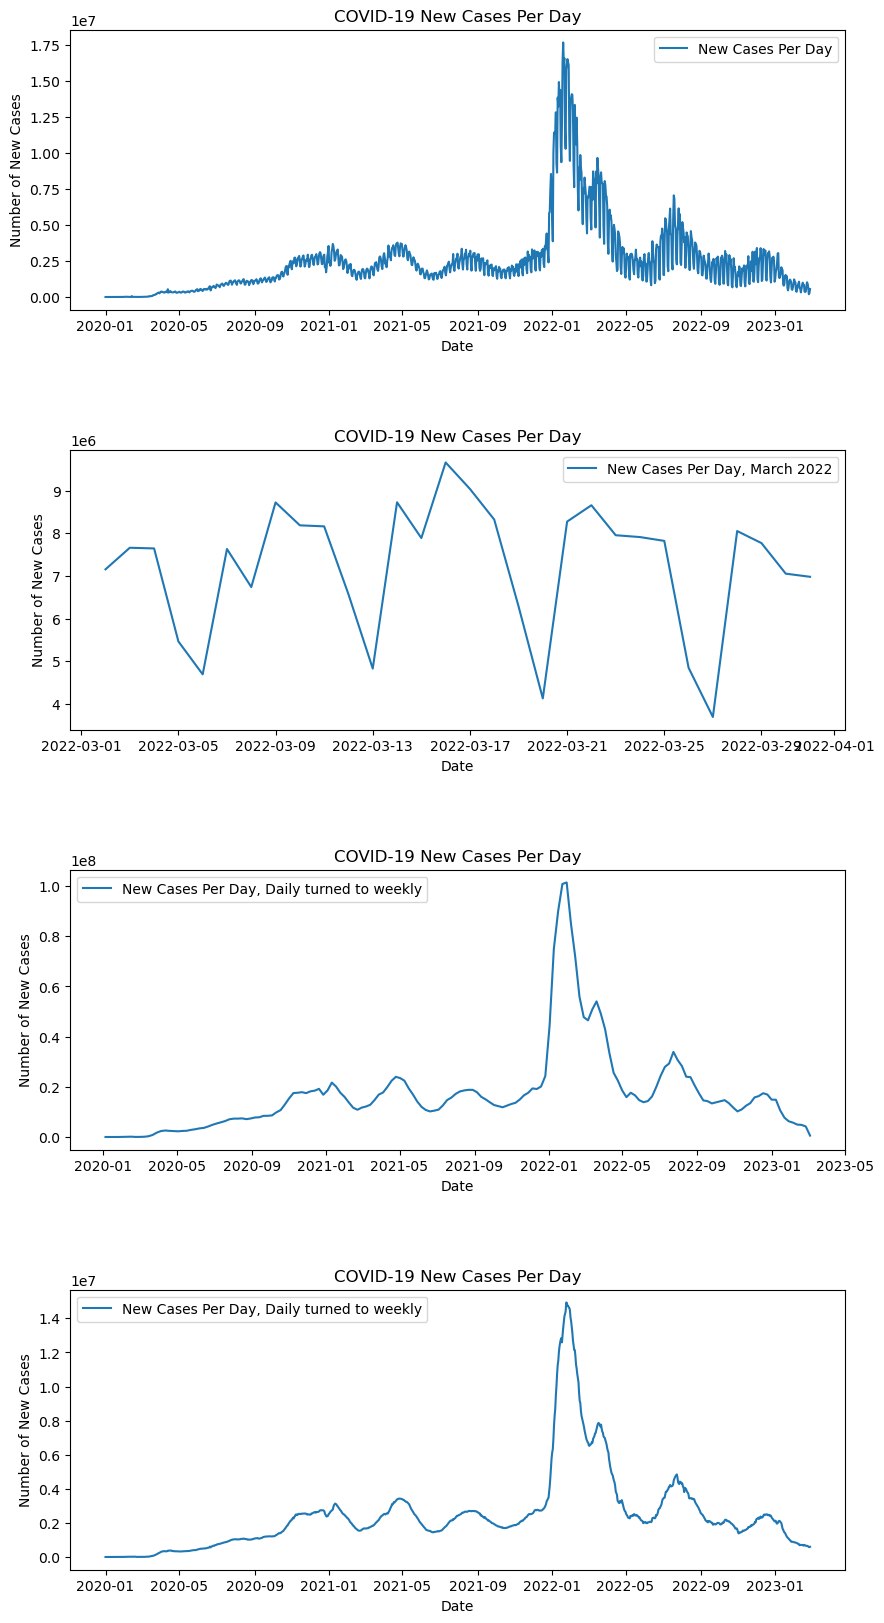

In [369]:
# Problem: Most countries did not publish covid numbers on the weekends
# Effect: This leads to an oscillating graph for daily new cases
# This can be solved with weekly new cases
# either extract data from new_daily or use the smoothed cases count
daily_cases = data.groupby('date')['new_cases'].sum()
data_march= data[(data['date']>'2022-03-01')&(data['date']<'2022-04-01')]
daily_cases_march = data_march.groupby('date')['new_cases'].sum()
daily_cases_weekly= data.groupby(pd.Grouper(key='date', freq='W')).sum()['new_cases']

# Plotting
fig, (ax1,ax2,ax3, ax4)=plt.subplots(4,1,figsize=(10,20))
ax1.plot(daily_cases, label='New Cases Per Day')
ax1.set(title='COVID-19 New Cases Per Day',
        xlabel='Date',
        ylabel='Number of New Cases'
        )
ax1.legend()
ax2.plot(daily_cases_march, label='New Cases Per Day, March 2022')
ax2.set(title='COVID-19 New Cases Per Day',
        xlabel='Date',
        ylabel='Number of New Cases'
        )
ax2.legend()
ax3.plot(daily_cases_weekly, label='New Cases Per Day, Daily turned to weekly')
ax3.set(title='COVID-19 New Cases Per Day',
        xlabel='Date',
        ylabel='Number of New Cases'
        )

ax3.legend()
ax4.plot(data.groupby('date')['new_cases_smoothed'].sum(), label='New Cases Per Day, Daily turned to weekly')
ax4.set(title='COVID-19 New Cases Per Day',
        xlabel='Date',
        ylabel='Number of New Cases'
        )

ax4.legend()
plt.subplots_adjust(hspace=0.5)
plt.savefig('../output/Introductory_Visualizations/Cases/newcasestotal.png')


#### 1.2 Cases over time by continent compact

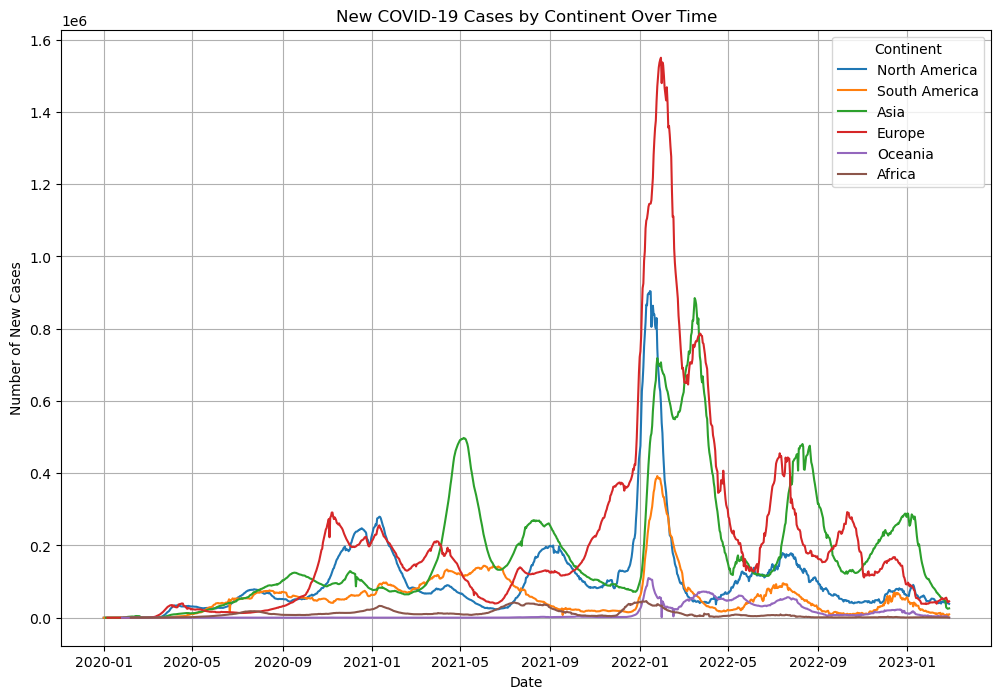

In [370]:
grouped_data = data[~(data['continent']==0)].groupby(['date', 'continent'])['new_cases_smoothed'].sum().reset_index()
plt.figure(figsize=(12, 8))
sns.lineplot(x='date', y='new_cases_smoothed', hue='continent', data=grouped_data)
plt.title('New COVID-19 Cases by Continent Over Time')
plt.xlabel('Date')
plt.ylabel('Number of New Cases')
plt.legend(title='Continent')
plt.grid(True)  
plt.savefig('../output/Introductory_Visualizations/Cases/newcasesbycontinent')

#### 1.3 Cases over time by continent in subplots

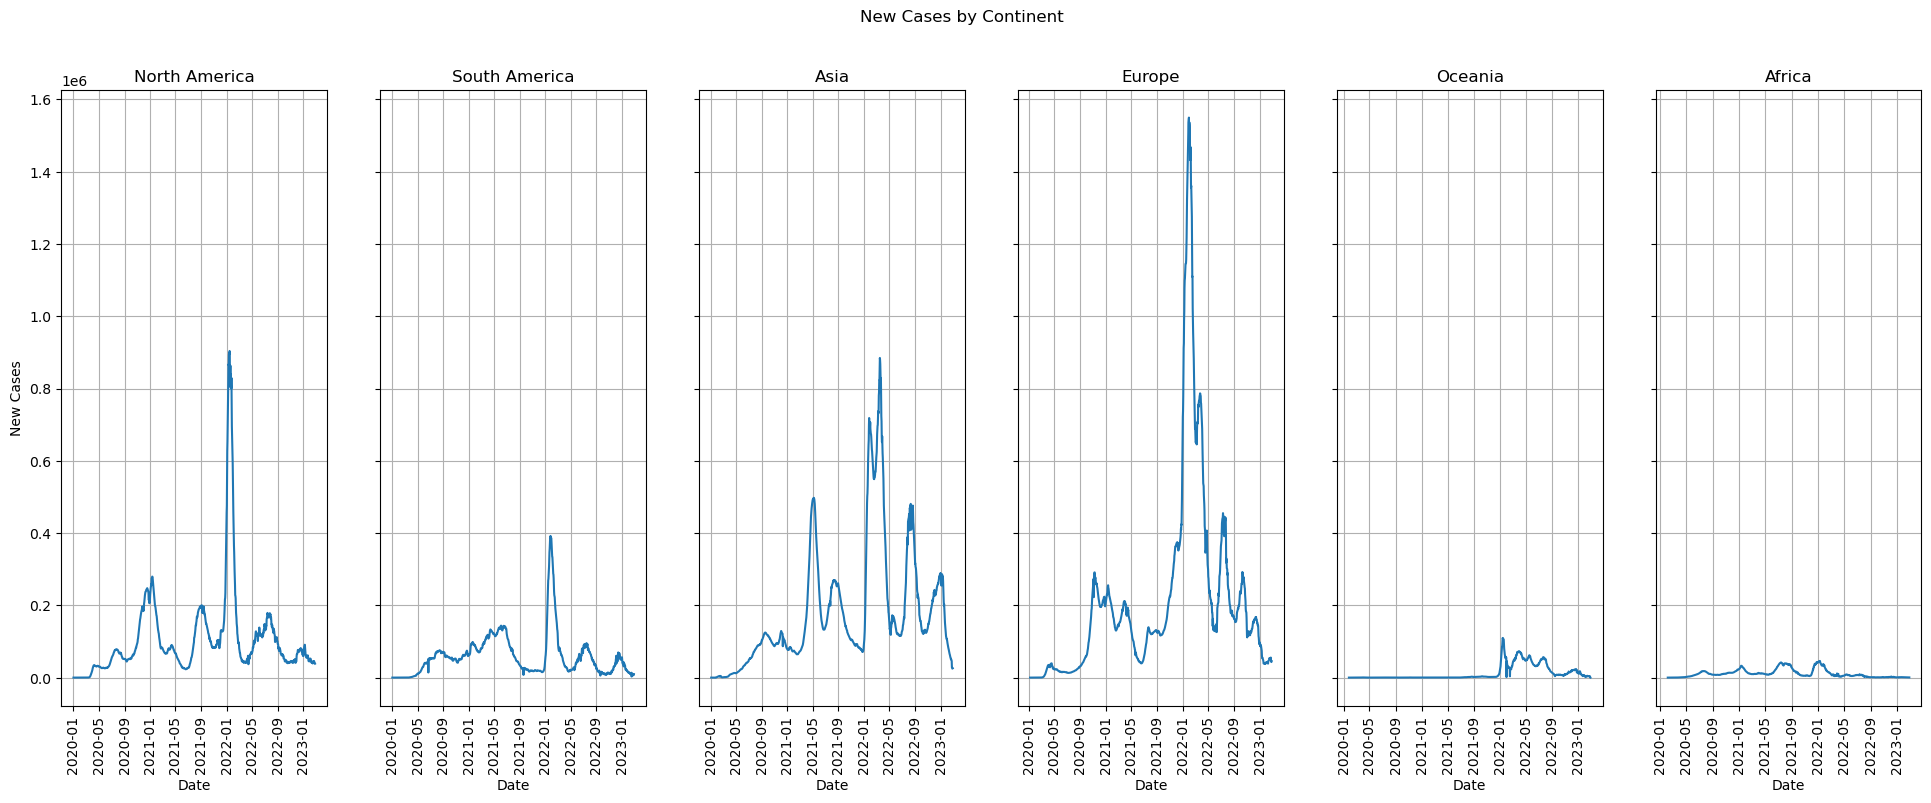

In [371]:
grouped_data = data[~(data['continent']==0)].groupby(['continent','date'])['new_cases_smoothed'].sum().reset_index()
continents_of_interest=['North America','South America','Asia','Europe','Oceania','Africa']
fig, axs = plt.subplots(1,6,figsize=(24,8), sharey=True)
for i,continent in enumerate(continents_of_interest):
        sns.lineplot(x='date', y='new_cases_smoothed',  data=grouped_data[grouped_data['continent']==continent],ax=axs[i])
        axs[i].set_xlabel('Date')
        axs[i].set_ylabel('New Cases')
        axs[i].set_title(continent)
        axs[i].tick_params(axis='x', rotation=90)
        axs[i].grid(True)
plt.suptitle('New Cases by Continent')
plt.savefig('../output/Introductory_Visualizations/Cases/casesbycontinentsp')


#### 1.4 Total cases vs total cases per million by continent

continent
North America    103389954.0
Asia              44687597.0
Europe            39656681.0
South America     37038230.0
Oceania           11366361.0
Africa             4063237.0
Name: total_cases, dtype: float64
continent
Europe           724428.492
Asia             619133.100
North America    586576.041
South America    507761.115
Africa           472908.013
Oceania          434204.950
Name: total_cases_per_million, dtype: float64


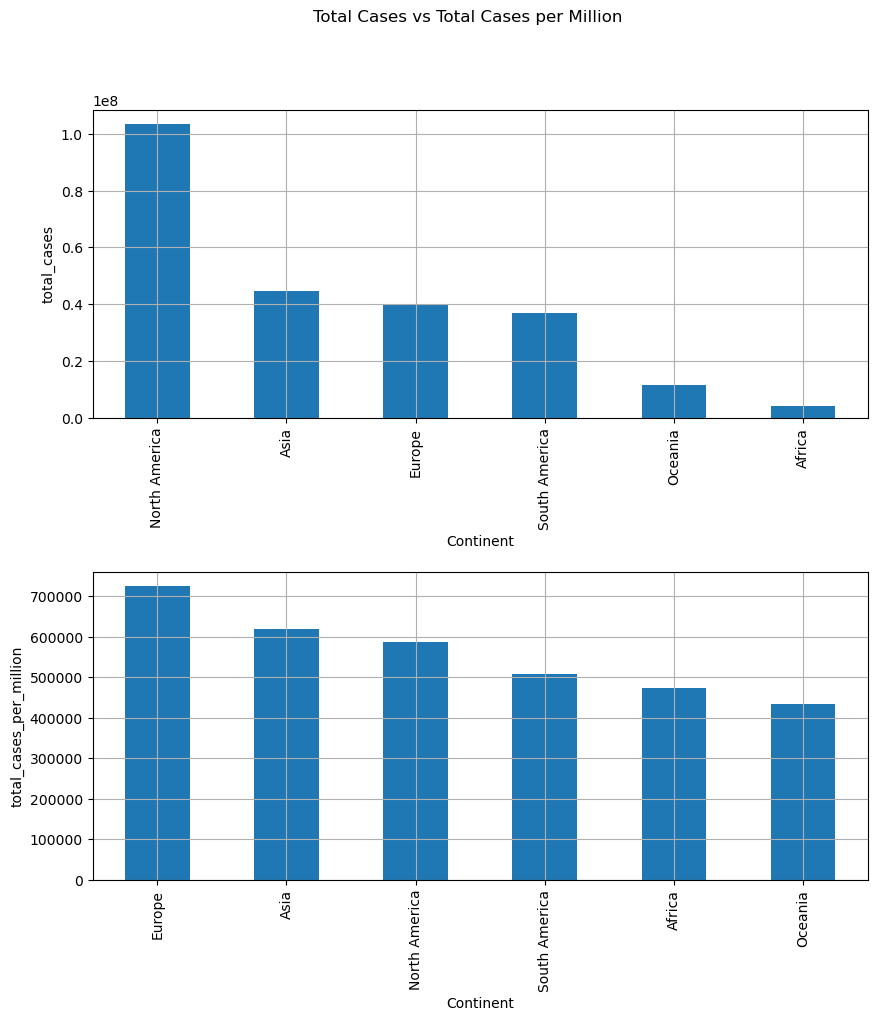

In [372]:
cases=['total_cases','total_cases_per_million']
fig, axs= plt.subplots(2,1,figsize=(10,10))
data_nozero=data[~(data['continent']==0)]
for i, variable in enumerate(cases):
        top_countries = data_nozero.groupby('continent')[variable].max().nlargest(10)
        print(top_countries)
        top_countries.plot(kind='bar', ax=axs[i],grid=True)
        axs[i].set_xlabel('Continent')
        axs[i].set_ylabel(variable)
plt.suptitle('Total Cases vs Total Cases per Million')
plt.subplots_adjust(hspace=0.5)
plt.savefig('../output/Introductory_Visualizations/Cases/casesbycontinent.png')

#### 1.5 Total cases vs total cases per million by country

iso_code
USA    103389954.0
IND     44687597.0
FRA     39656681.0
DEU     38144033.0
BRA     37038230.0
JPN     33212438.0
KOR     30513721.0
ITA     25576852.0
GBR     24370154.0
RUS     21951059.0
Name: total_cases, dtype: float64
iso_code
CYP    724428.492
SMR    698604.927
AUT    660588.144
FRO    652484.139
SVN    626271.380
GIB    624996.175
BRN    619133.100
AND    599501.522
KOR    588888.260
SPM    586576.041
Name: total_cases_per_million, dtype: float64


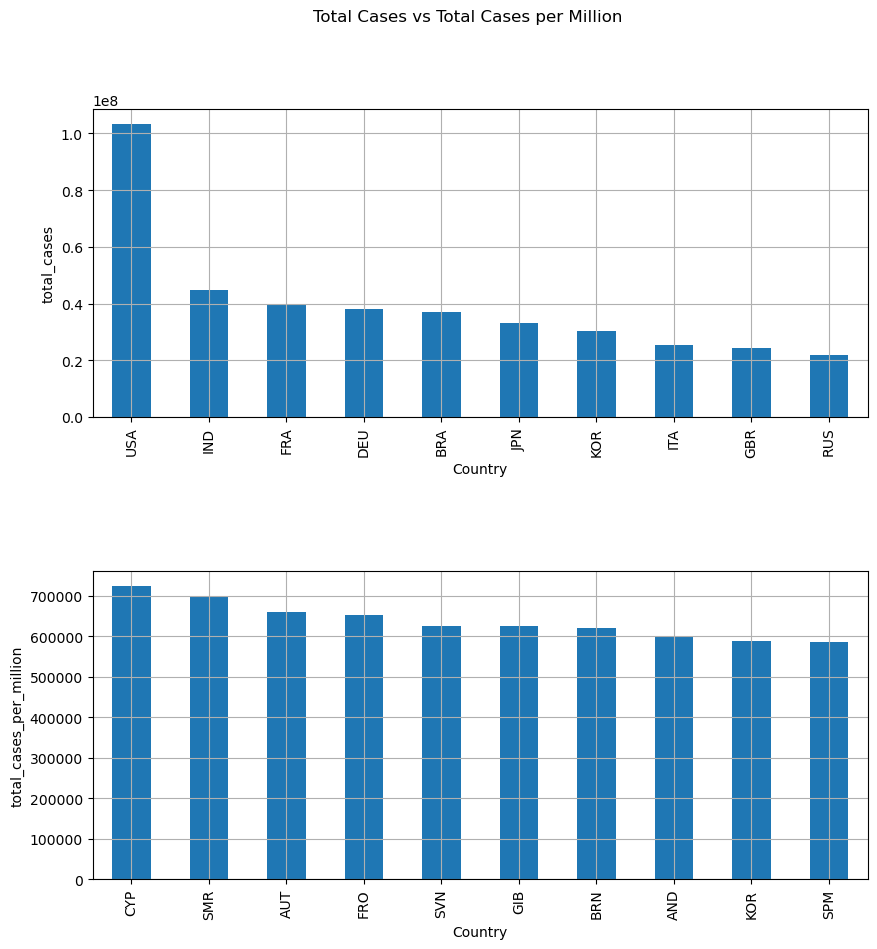

In [373]:
cases=['total_cases','total_cases_per_million']
fig, axs= plt.subplots(2,1,figsize=(10,10))
data_noowid=data[~data['iso_code'].str.startswith("OWID_")]
for i, variable in enumerate(cases):
        top_countries = data_noowid.groupby('iso_code')[variable].max().nlargest(10)
        print(top_countries)
        top_countries.plot(kind='bar', ax=axs[i],grid=True)
        axs[i].set_xlabel('Country')
        axs[i].set_ylabel(variable)
plt.suptitle('Total Cases vs Total Cases per Million')
plt.subplots_adjust(hspace=0.5)
plt.savefig('../output/Introductory_Visualizations/Cases/casesbycountry.png')

#### 1.6 Scatter plots with variables of interest to see correlation with total cases

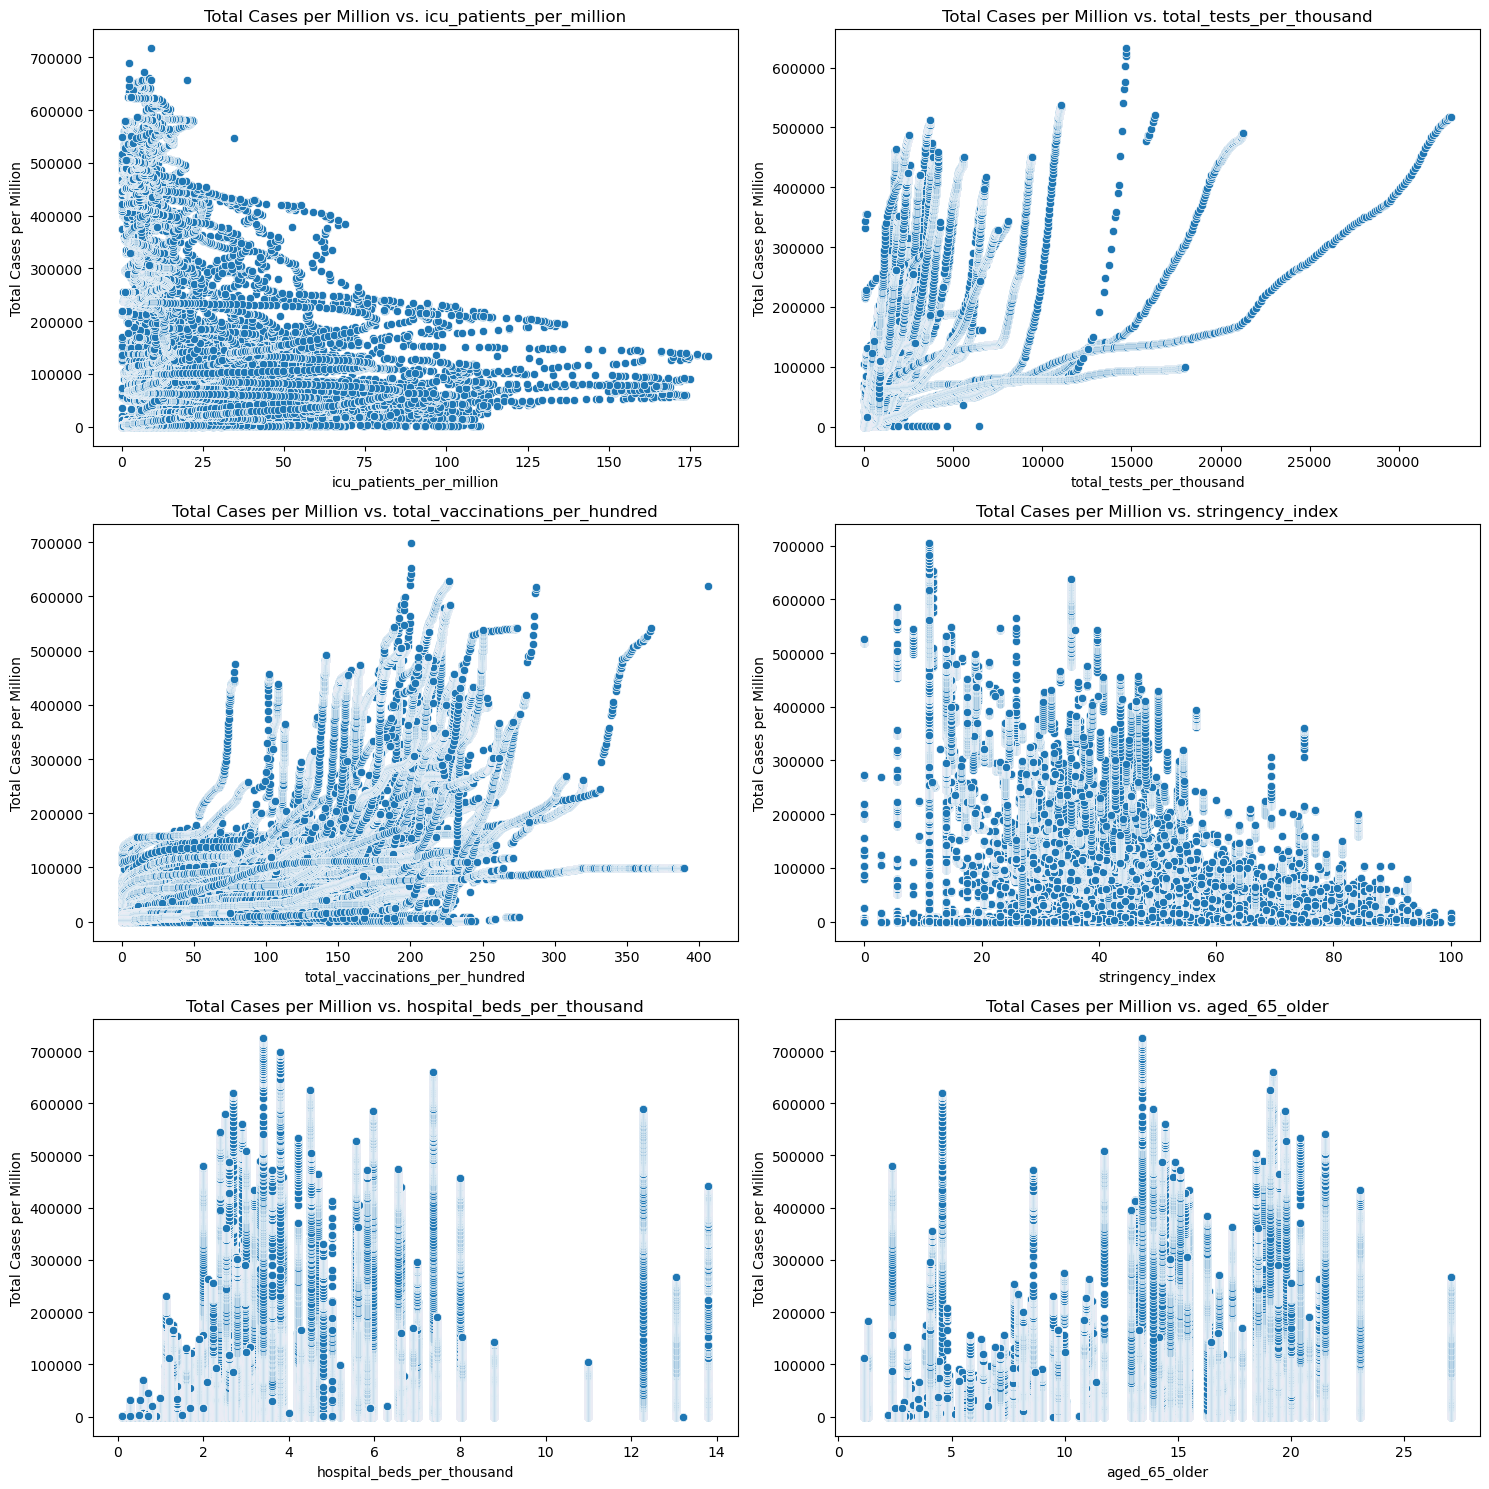

In [374]:
variables_of_interest = [
    'icu_patients_per_million', 'total_tests_per_thousand', 'total_vaccinations_per_hundred',
    'stringency_index', 'hospital_beds_per_thousand', 'aged_65_older'
]
fig, axs = plt.subplots(3, 2, figsize=(15, 15))
axs = axs.flatten()
for i, variable in enumerate(variables_of_interest):
    sns.scatterplot(x=variable, y='total_cases_per_million', data=data, ax=axs[i], markers='.')
    axs[i].set_title(f'Total Cases per Million vs. {variable}')
    axs[i].set_xlabel(variable)
    axs[i].set_ylabel('Total Cases per Million')
plt.tight_layout()
plt.savefig('../output/Introductory_Visualizations/Cases/totcasescorr.png')

### 2. Deaths visualized

#### 2.1 New deaths

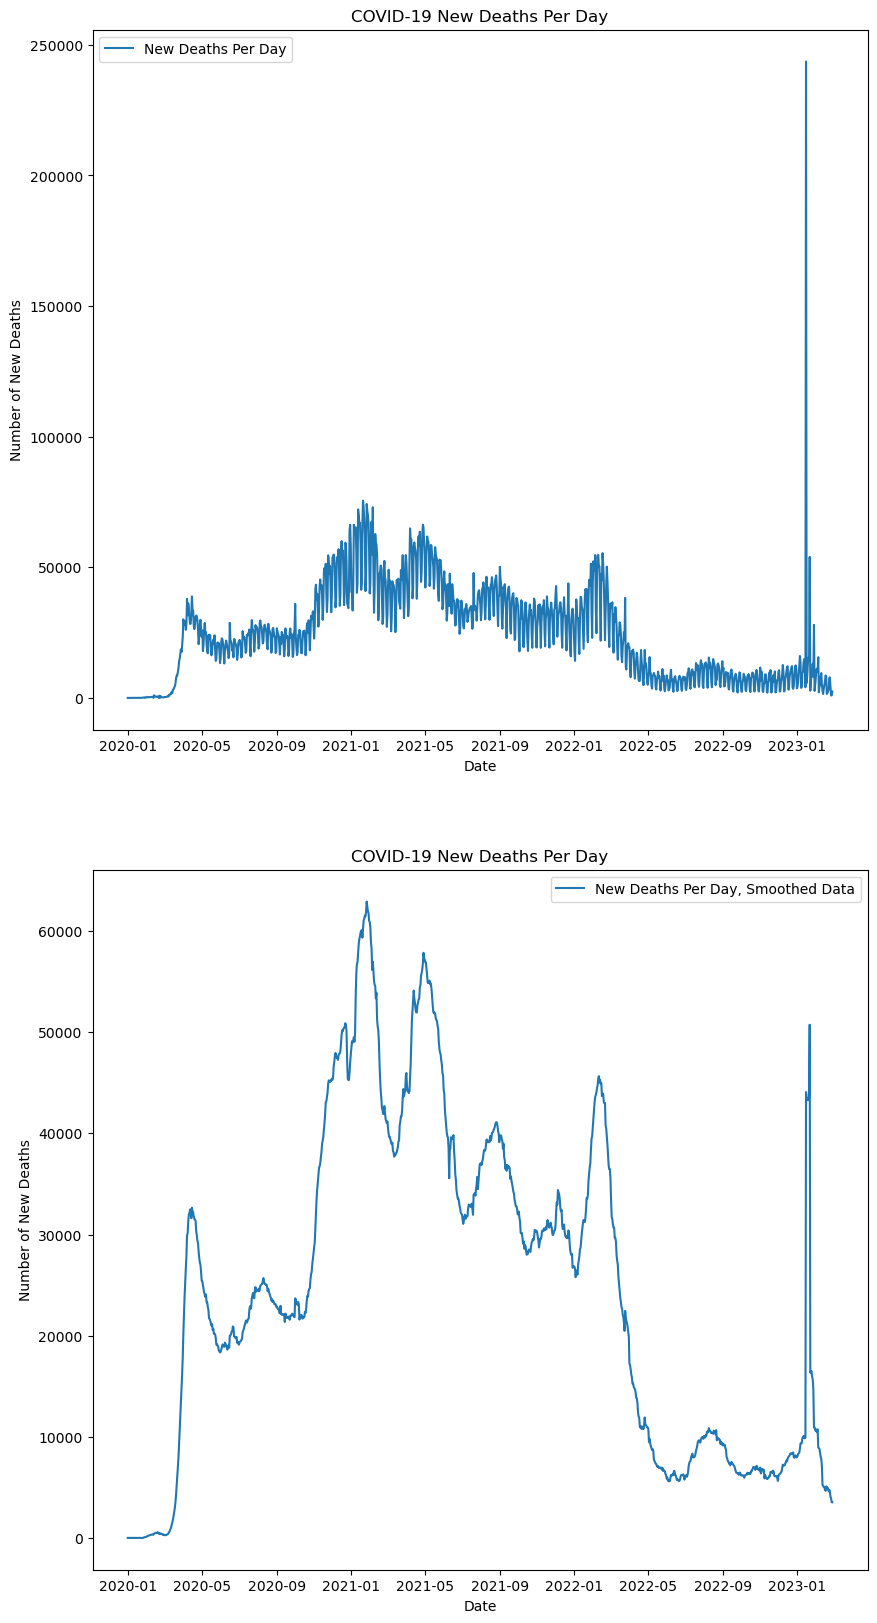

In [375]:
daily_deaths = data.groupby('date')['new_deaths'].sum()
daily_deaths_smoothed = data.groupby('date')['new_deaths_smoothed'].sum()

fig, (ax1,ax2) = plt.subplots(2,1,figsize=(10,20))

ax1.plot(daily_deaths, label='New Deaths Per Day')
ax1.set(title='COVID-19 New Deaths Per Day', xlabel='Date', ylabel='Number of New Deaths')
ax1.legend()

ax2.plot(daily_deaths_smoothed, label='New Deaths Per Day, Smoothed Data')
ax2.set(title='COVID-19 New Deaths Per Day', xlabel='Date', ylabel='Number of New Deaths')
ax2.legend()

plt.savefig("../output/Introductory_Visualizations/Deaths/new_deaths.png")

Trying to find out if there is a difference in deaths per million among the continents.

In [376]:
new_deaths_per_million_continent = data.groupby(['date', 'continent'])['new_deaths_per_million'].sum().reset_index()
new_deaths_per_million_continent_smoothed = data.groupby(['date', 'continent'])['new_deaths_smoothed_per_million'].sum().reset_index()
total_cases_per_continent = data.groupby(['date', 'continent'])['total_cases_per_million'].sum().reset_index()
print(new_deaths_per_million_continent)
print(new_deaths_per_million_continent_smoothed)

           date      continent  new_deaths_per_million
0    2020-01-01  North America                   0.000
1    2020-01-01  South America                   0.000
2    2020-01-02  North America                   0.000
3    2020-01-02  South America                   0.000
4    2020-01-03  North America                   0.000
...         ...            ...                     ...
6833 2023-02-27           Asia                   2.713
6834 2023-02-27         Europe                  19.885
6835 2023-02-27  North America                   0.855
6836 2023-02-27        Oceania                   0.000
6837 2023-02-27  South America                   1.555

[6838 rows x 3 columns]
           date      continent  new_deaths_smoothed_per_million
0    2020-01-01  North America                            0.000
1    2020-01-01  South America                            0.000
2    2020-01-02  North America                            0.000
3    2020-01-02  South America                            0

#### 2.2 New deaths per million by continent

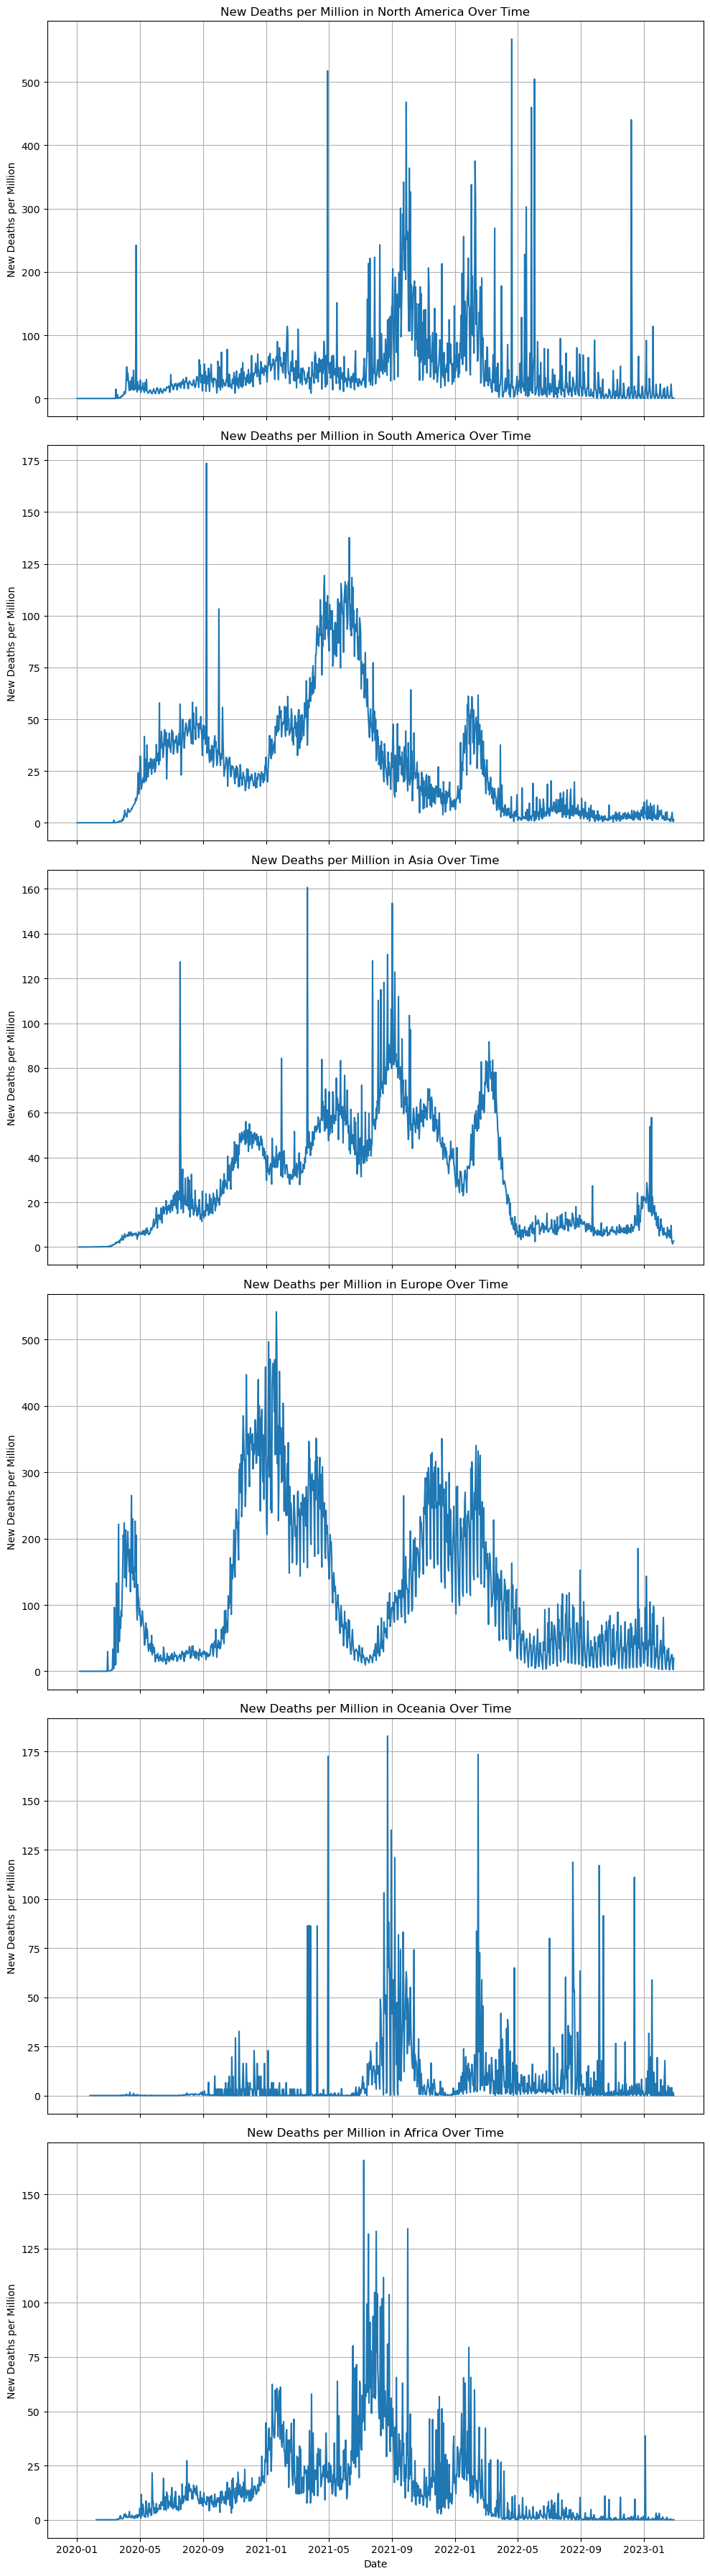

In [377]:
continents_deaths = new_deaths_per_million_continent['continent'].unique()
#Creating suplots per Continent with the real counts
fig, axes = plt.subplots(len(continents_deaths), 1, figsize=(10, 6*len(continents_deaths)), sharex=True)
# Iterate over each continent and create a subplot
for i, continent in enumerate(continents_deaths):
    continent_data = new_deaths_per_million_continent[new_deaths_per_million_continent['continent'] == continent]
    sns.lineplot(data=continent_data, x='date', y='new_deaths_per_million', ax=axes[i])
    axes[i].set_title(f'New Deaths per Million in {continent} Over Time')
    axes[i].set_ylabel('New Deaths per Million')
    axes[i].set_xlabel('Date')
    axes[i].grid(True)
    
plt.tight_layout()

plt.savefig("../output/Introductory_Visualizations/Deaths/NewDeathsPerMillion_Subplots.png")


#### 2.3 Smoothed new deaths per million by continent

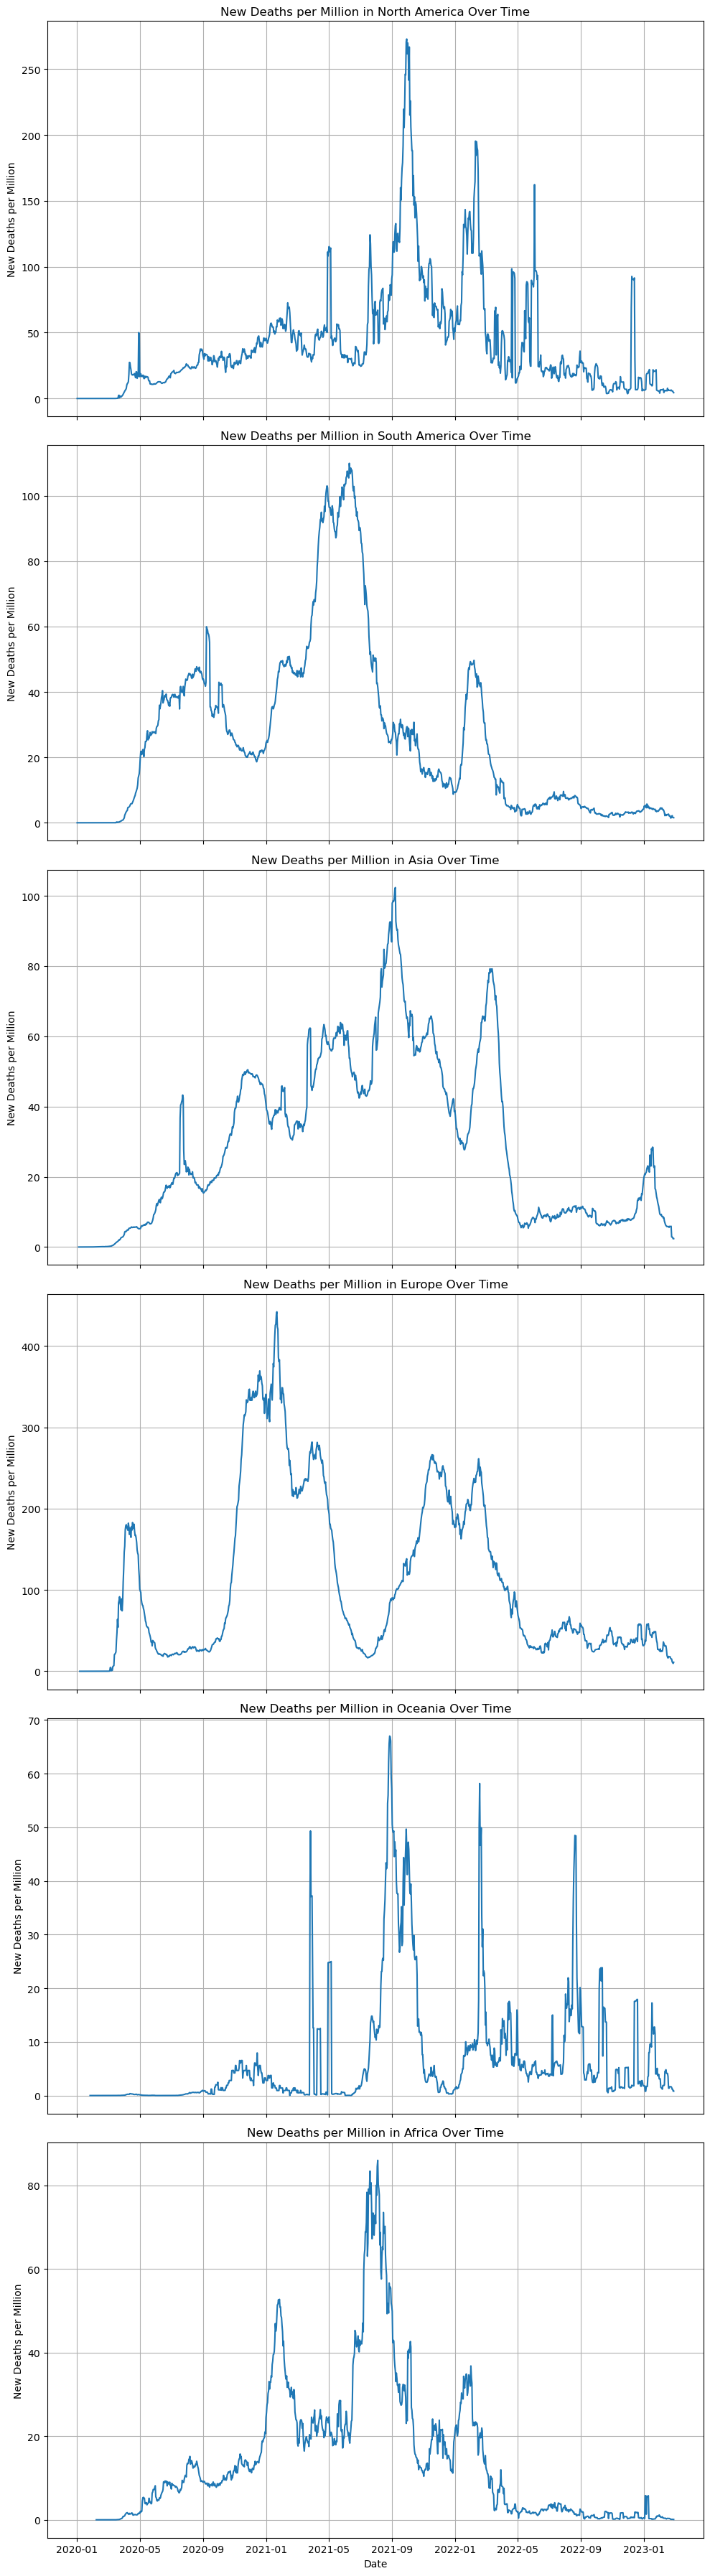

In [378]:
fig, axes = plt.subplots(len(continents_deaths), 1, figsize=(10, 6*len(continents_deaths)), sharex=True)

for i, continent in enumerate(continents_deaths):
    continent_data = new_deaths_per_million_continent_smoothed[new_deaths_per_million_continent_smoothed['continent'] == continent]
    sns.lineplot(data=continent_data, x='date', y='new_deaths_smoothed_per_million', ax=axes[i])
    axes[i].set_title(f'New Deaths per Million in {continent} Over Time')
    axes[i].set_ylabel('New Deaths per Million')
    axes[i].set_xlabel('Date')
    axes[i].grid(True)
    
plt.tight_layout()

plt.savefig("../output/Introductory_Visualizations/Deaths/NewDeathsPerMillionSmoothed_Subplots.png")

#### 2.4 New deaths per million divided by total cases

Trying to make a statement about the severity by analyzing the new deaths per million divided by the total cases.
Merge the new deaths and total cases. Calculate new deaths per million divided by total cases per million.

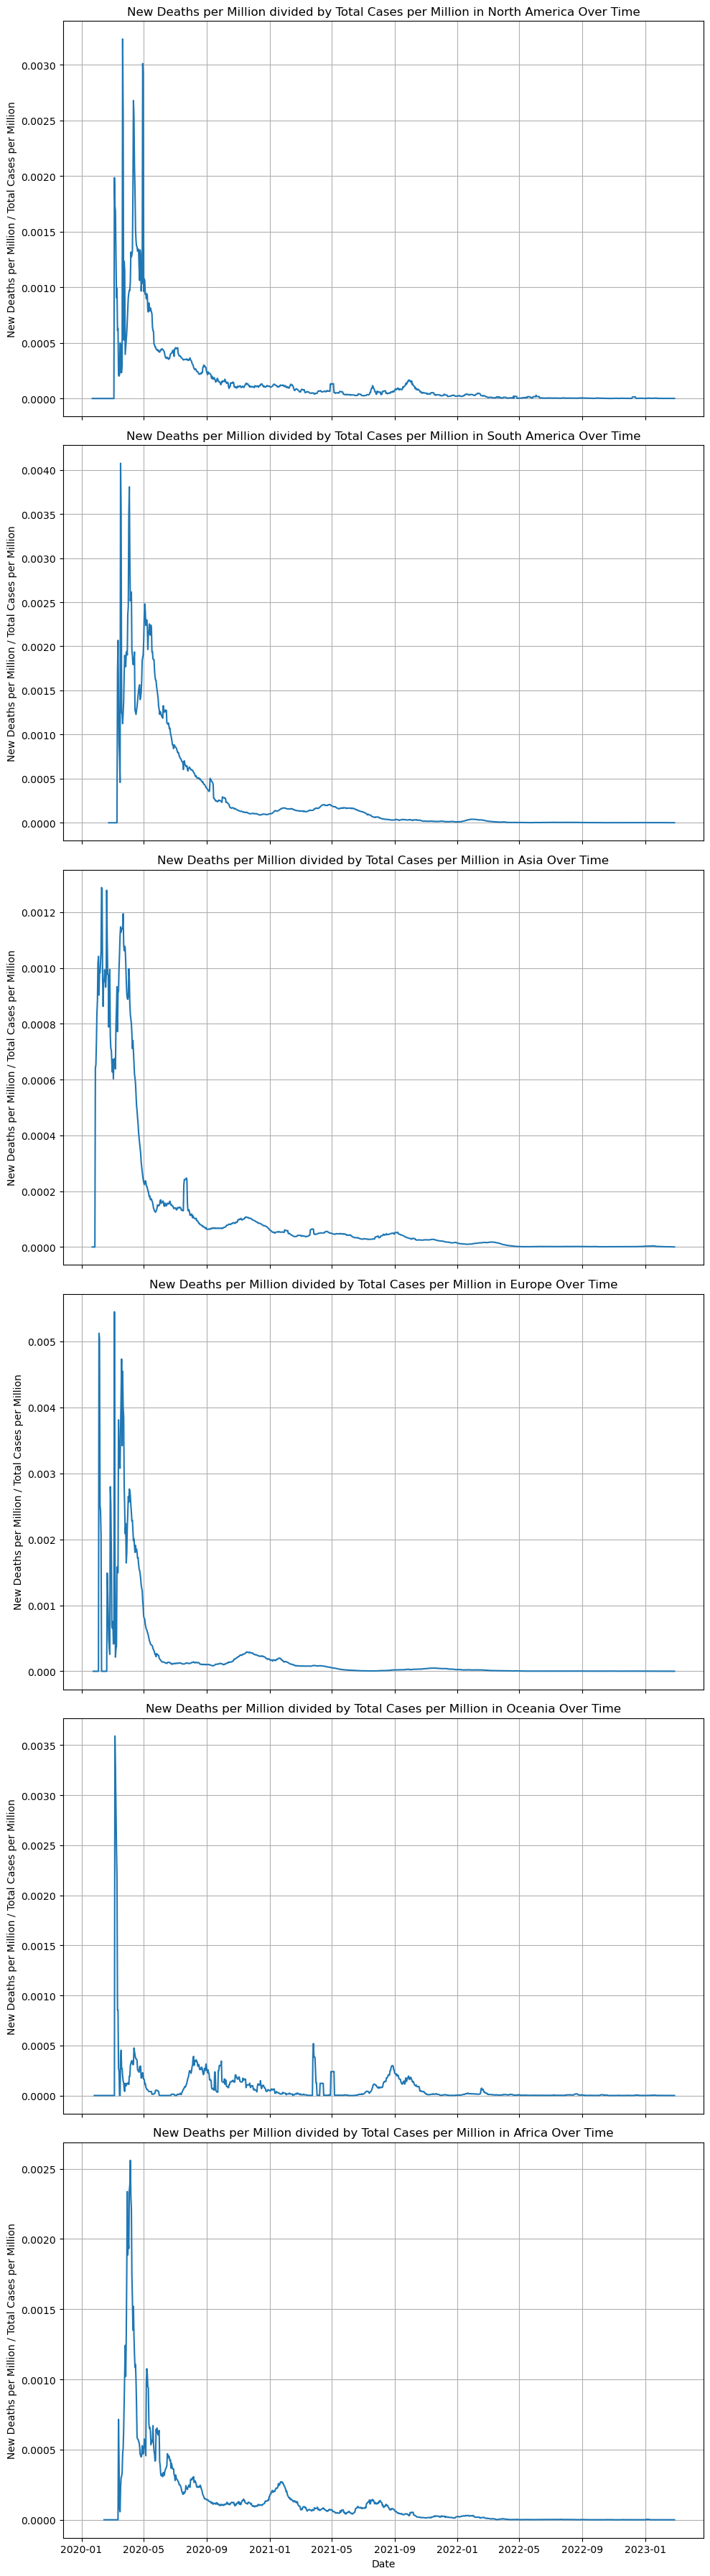

In [379]:
death_cases_merge = pd.merge(new_deaths_per_million_continent_smoothed, total_cases_per_continent, on=['date', 'continent'])
death_cases_merge['deaths_to_cases_ratio'] = death_cases_merge['new_deaths_smoothed_per_million'] / death_cases_merge['total_cases_per_million']


fig, axes = plt.subplots(len(continents_deaths), 1, figsize=(10, 6*len(continents_deaths)), sharex=True)

for i, continent in enumerate(continents_deaths):
    continent_data = death_cases_merge[death_cases_merge['continent'] == continent]
    sns.lineplot(data=continent_data, x='date', y='deaths_to_cases_ratio', ax=axes[i])
    axes[i].set_title(f'New Deaths per Million divided by Total Cases per Million in {continent} Over Time')
    axes[i].set_ylabel('New Deaths per Million / Total Cases per Million')
    axes[i].set_xlabel('Date')
    axes[i].grid(True)
    
plt.tight_layout()

plt.savefig("../output/Introductory_Visualizations/Deaths/NewDeathsToCasesRatio_Subplots.png")

## 4 Missing Data Analysis


### Structure


1. Introductory remarks about OWID
2. Preparatory steps
3. First overview of missing data
4. Overview missing data "cases" and "deaths"
5. Total cases continent analysis
6. Factual accuracy
7. Country analysis


### 1. Introductory remarks about OWID

OWID itself states that it generally takes its data from 4 different sources:
1. Specialized institutes
2. Research articles
3. International Institutations or statistics agencies
4. Official data from government sources

More specifically, looking at the OWID COVID dataset online where all the sources are indicated, it can be seen that OWID takes most of the data directly from the WHO COVID dashboard and then completes it with other sources which is why this dataset can be expected to be quite complete. However, the following analysis is attempting to analyze how much data is missing from the dataset and what kind of data is missing. 

### 2. Preparatory steps

#### 2.1 Adjusting visualization settings

In [380]:
# Define colorblind-friendly palette
color_palette = sns.color_palette("colorblind")

In [381]:
#adjusting the viewing options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

#### 2.2 Data Cleaning


In [382]:
#dropping duplicates
data = data.drop_duplicates()
#separating OWID from non_OWID data
data_without_OWID = data[~data['iso_code'].str.contains('OWID')]
data_OWID = data[data['iso_code'].str.contains('OWID')]

What OWID contains:

In [383]:
grouped_OWID_loc = data_OWID.groupby("location")
loc_OWID = list(grouped_OWID_loc.groups.keys())
print(loc_OWID)

['Africa', 'Asia', 'England', 'Europe', 'European Union', 'High income', 'International', 'Kosovo', 'Low income', 'Lower middle income', 'North America', 'Northern Cyprus', 'Northern Ireland', 'Oceania', 'Scotland', 'South America', 'Upper middle income', 'Wales', 'World']


OWID contains a few extra metrics and countries/continents or composites of such.

### 3. First overview of missing data

#### 3.1 Entries with complete information

In [384]:
#For how many entries do we have complete information?
(data.isna().sum(axis=1) == 0).sum()

0

#### 3.2 Missing values per column overall

In [385]:
#missing values overall per column
total_missing = data.isnull().sum()
total_missing_percentage = (total_missing / len(data)) * 100
total_missing_sorted = total_missing.sort_values()
total_missing_percentage_sorted = total_missing_percentage.sort_values()

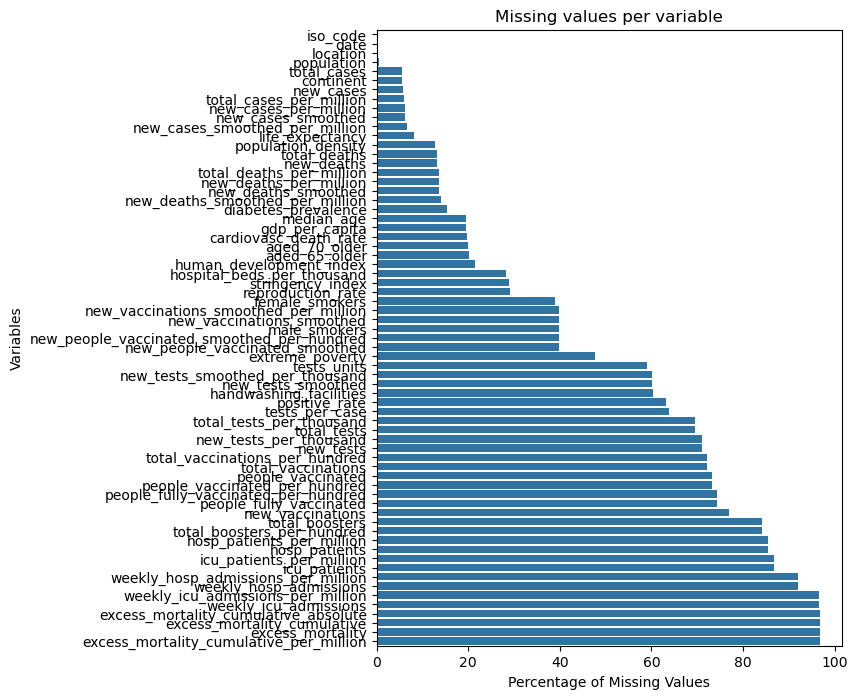

In [386]:
#graphing the missing values per column
plt.figure(figsize=(6, 8))
fig_mv_variables = sns.barplot(
    x = total_missing_percentage_sorted.values,
    y = total_missing_percentage_sorted.index
)
fig_mv_variables.set(
    title="Missing values per variable",
    xlabel="Percentage of Missing Values",
    ylabel="Variables"
)
plt.savefig("../output/Missing_Data_Analysis/missing_data.png", bbox_inches="tight")              

### 4. Overview missing data "cases" and "deaths"

#### 4.1 Selecting only the columns containing information about cases and deaths

In [387]:
#selecting the columns about cases of interest
columns_about_cases = data.loc[:, data.columns.str.contains('cases')]
columns_about_cases.columns

Index(['total_cases', 'new_cases', 'new_cases_smoothed', 'total_cases_per_million', 'new_cases_per_million', 'new_cases_smoothed_per_million'], dtype='object')

In [388]:
columns_about_deaths = data.loc[:, data.columns.str.contains('death')]
columns_about_deaths.columns

Index(['total_deaths', 'new_deaths', 'new_deaths_smoothed', 'total_deaths_per_million', 'new_deaths_per_million', 'new_deaths_smoothed_per_million', 'cardiovasc_death_rate'], dtype='object')

#### 4.2 Sorting and plotting overall missing data about cases

In [389]:
def missing_data_filtered(columns_of_interest):
    total_missing = columns_of_interest.isnull().sum()
    total_missing_percentage = (total_missing / len(data)) * 100
    total_missing_sorted = total_missing.sort_values()
    total_missing_percentage_sorted = total_missing_percentage.sort_values()
    return total_missing_percentage_sorted

total_missing_percentage_deaths_sorted = missing_data_filtered(columns_about_deaths)

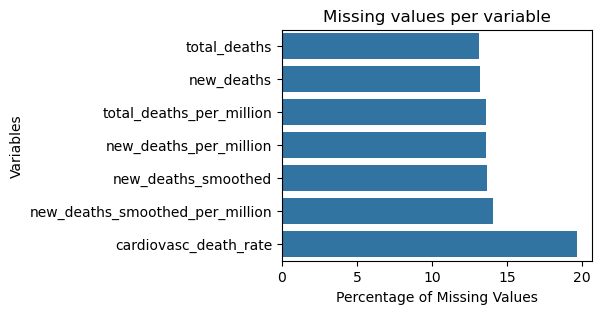

In [390]:
plt.figure(figsize=(4, 3))
deaths_overview = sns.barplot(
    x = total_missing_percentage_deaths_sorted.values,
    y = total_missing_percentage_deaths_sorted.index
)
deaths_overview.set(
    title="Missing values per variable",
    xlabel="Percentage of Missing Values",
    ylabel="Variables"
)
plt.savefig("../output/Missing_Data_Analysis/deathsmissing_data.png", bbox_inches="tight")  

#### 4.3 Sorting and plotting overall missing data about deaths

In [391]:
total_missing_percentage_cases_sorted = missing_data_filtered(columns_about_cases)

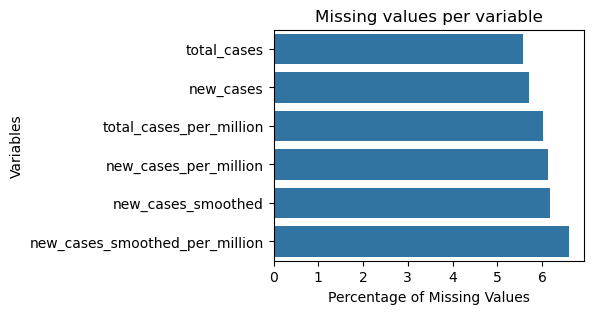

In [392]:
plt.figure(figsize=(4, 3))
cases_overview = sns.barplot(
    x = total_missing_percentage_cases_sorted.values,
    y = total_missing_percentage_cases_sorted.index
)
cases_overview.set(
    title="Missing values per variable",
    xlabel="Percentage of Missing Values",
    ylabel="Variables"
)
plt.savefig("../output/Missing_Data_Analysis/casesmissing_data.png", bbox_inches="tight") 

There is in the overall dataset a lot more data around cases than deaths. However, amongst the columns that give information about either death or cases, the variability as to the amount of missing data is low.

### 5 Total cases continent analysis


#### 5.1 Amount of data per country

Comment: Since reporting is generally done on a national level, it makes sense to have a look at individual countries to find out where potential data is missing.

In [393]:
#how many countries are we dealing with overall
unique_values_world = data_without_OWID['iso_code'].unique()
print (len(unique_values_world))

229


In [394]:
#calculating the number of entries for each country
length_list = []
length_list_in_years = []

for i in range(len(unique_values_world)):
    country = unique_values_world[i]
    length_country = len(data_without_OWID.loc[df['iso_code'] == country])
    length_list.append(length_country)
    length_list_in_years.append(length_country/365)

sorted_country_length = sorted(length_list)

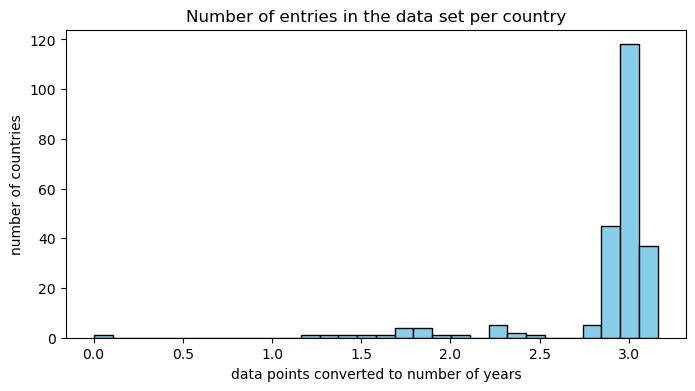

In [395]:
plt.figure(figsize=(8, 4))
plt.hist(length_list_in_years, bins=30, color='skyblue', edgecolor='black')
plt.xlabel('data points converted to number of years')
plt.ylabel('number of countries')
plt.title("Number of entries in the data set per country")
plt.show()

#### 5.2 Total cases Asia


In [396]:
#different continents
filtered_continents = data_without_OWID["continent"].unique()
filtered_continents

array(['Asia', 'Europe', 'Africa', 'North America', 'South America',
       'Oceania'], dtype=object)

In [397]:
#function returning list of all different countries on one continent
def countries_per_continent(continent):
    filtered_continent = data_without_OWID.loc[df['continent'] == continent]
    unique_values_continent = filtered_continent['iso_code'].unique()
    return unique_values_continent

unique_values_Asia = countries_per_continent("Asia")
unique_values_Asia

array(['AFG', 'ARM', 'AZE', 'BHR', 'BGD', 'BTN', 'BRN', 'KHM', 'CHN',
       'GEO', 'HKG', 'IND', 'IDN', 'IRN', 'IRQ', 'ISR', 'JPN', 'JOR',
       'KAZ', 'KWT', 'KGZ', 'LAO', 'LBN', 'MAC', 'MYS', 'MDV', 'MNG',
       'MMR', 'NPL', 'PRK', 'OMN', 'PAK', 'PSE', 'PHL', 'QAT', 'SAU',
       'SGP', 'KOR', 'LKA', 'SYR', 'TWN', 'TJK', 'THA', 'TLS', 'TUR',
       'TKM', 'ARE', 'UZB', 'VNM', 'YEM'], dtype=object)

In [398]:
def continent_values(continent_uniq_val):
    values = []
    for i in range(len(continent_uniq_val)):
        currentcountry = continent_uniq_val[i]
        filtered_country = data.loc[df['iso_code'] == currentcountry]
        no_rows_current_country = len(filtered_country)
        missing = (filtered_country["total_cases"].isnull().sum())
        total_missing_percentage_current_country = (missing / len(filtered_country)) * 100
        values.append(total_missing_percentage_current_country)
    return values

values_Asia = continent_values(unique_values_Asia)

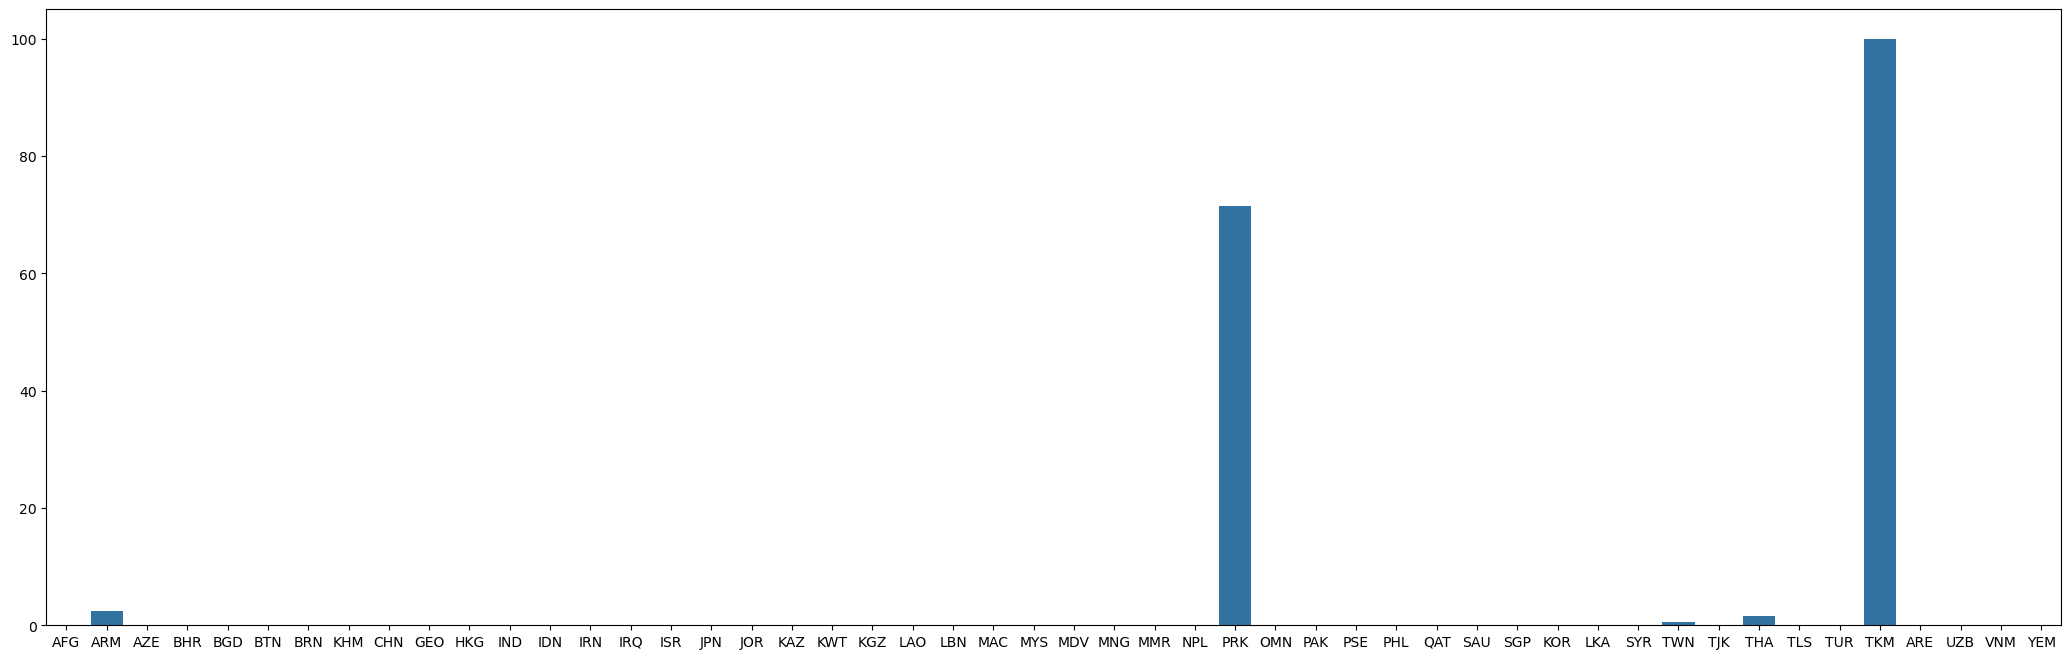

In [399]:
def plotting_barplot_continent (unique_codes, values):
    plt.figure(figsize=(26, 8))
    missing_values_Asia = sns.barplot(
        x = unique_codes,
        y = values
    )

    deaths_overview.set(
        title="Missing values per variable",
        xlabel="Percentage of Missing Values",
        ylabel="Variables"
    )

    plt.savefig("../output/Missing_Data_Analysis/casesmissing_data2.png", bbox_inches="tight") 

plotting_barplot_continent(unique_values_Asia, values_Asia)

#### 5.3 Total Cases Europe

In [400]:
unique_values_Europe = countries_per_continent("Europe")
unique_values_Europe

array(['ALB', 'AND', 'AUT', 'BLR', 'BEL', 'BIH', 'BGR', 'HRV', 'CYP',
       'CZE', 'DNK', 'EST', 'FRO', 'FIN', 'FRA', 'DEU', 'GIB', 'GRC',
       'GGY', 'HUN', 'ISL', 'IRL', 'IMN', 'ITA', 'JEY', 'LVA', 'LIE',
       'LTU', 'LUX', 'MLT', 'MDA', 'MCO', 'MNE', 'NLD', 'MKD', 'NOR',
       'POL', 'PRT', 'ROU', 'RUS', 'SMR', 'SRB', 'SVK', 'SVN', 'ESP',
       'SWE', 'CHE', 'UKR', 'GBR', 'VAT'], dtype=object)

In [401]:
values_Europe = continent_values(unique_values_Europe)

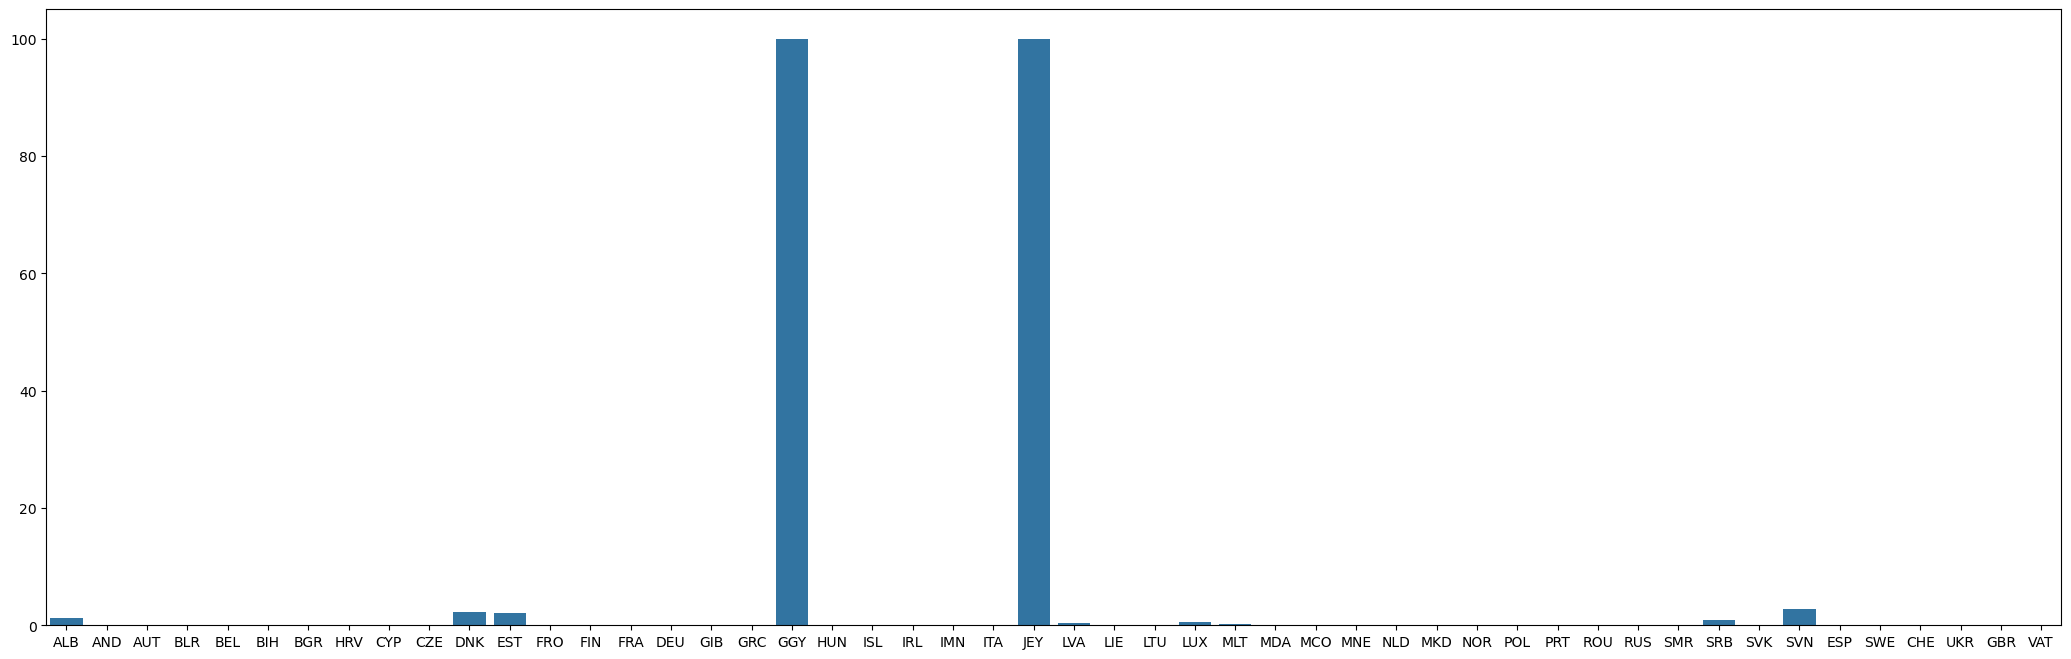

In [402]:
plotting_barplot_continent(unique_values_Europe, values_Europe)

#### 5.4 Total Cases Africa

In [403]:
unique_values_Africa = countries_per_continent("Africa")
unique_values_Africa

array(['DZA', 'AGO', 'BEN', 'BWA', 'BFA', 'BDI', 'CMR', 'CPV', 'CAF',
       'TCD', 'COM', 'COG', 'CIV', 'COD', 'DJI', 'EGY', 'GNQ', 'ERI',
       'SWZ', 'ETH', 'GAB', 'GMB', 'GHA', 'GIN', 'GNB', 'KEN', 'LSO',
       'LBR', 'LBY', 'MDG', 'MWI', 'MLI', 'MRT', 'MUS', 'MAR', 'MOZ',
       'NAM', 'NER', 'NGA', 'RWA', 'SHN', 'STP', 'SEN', 'SYC', 'SLE',
       'SOM', 'ZAF', 'SSD', 'SDN', 'TZA', 'TGO', 'TUN', 'UGA', 'ESH',
       'ZMB', 'ZWE'], dtype=object)

In [404]:
values_Africa = continent_values(unique_values_Africa)

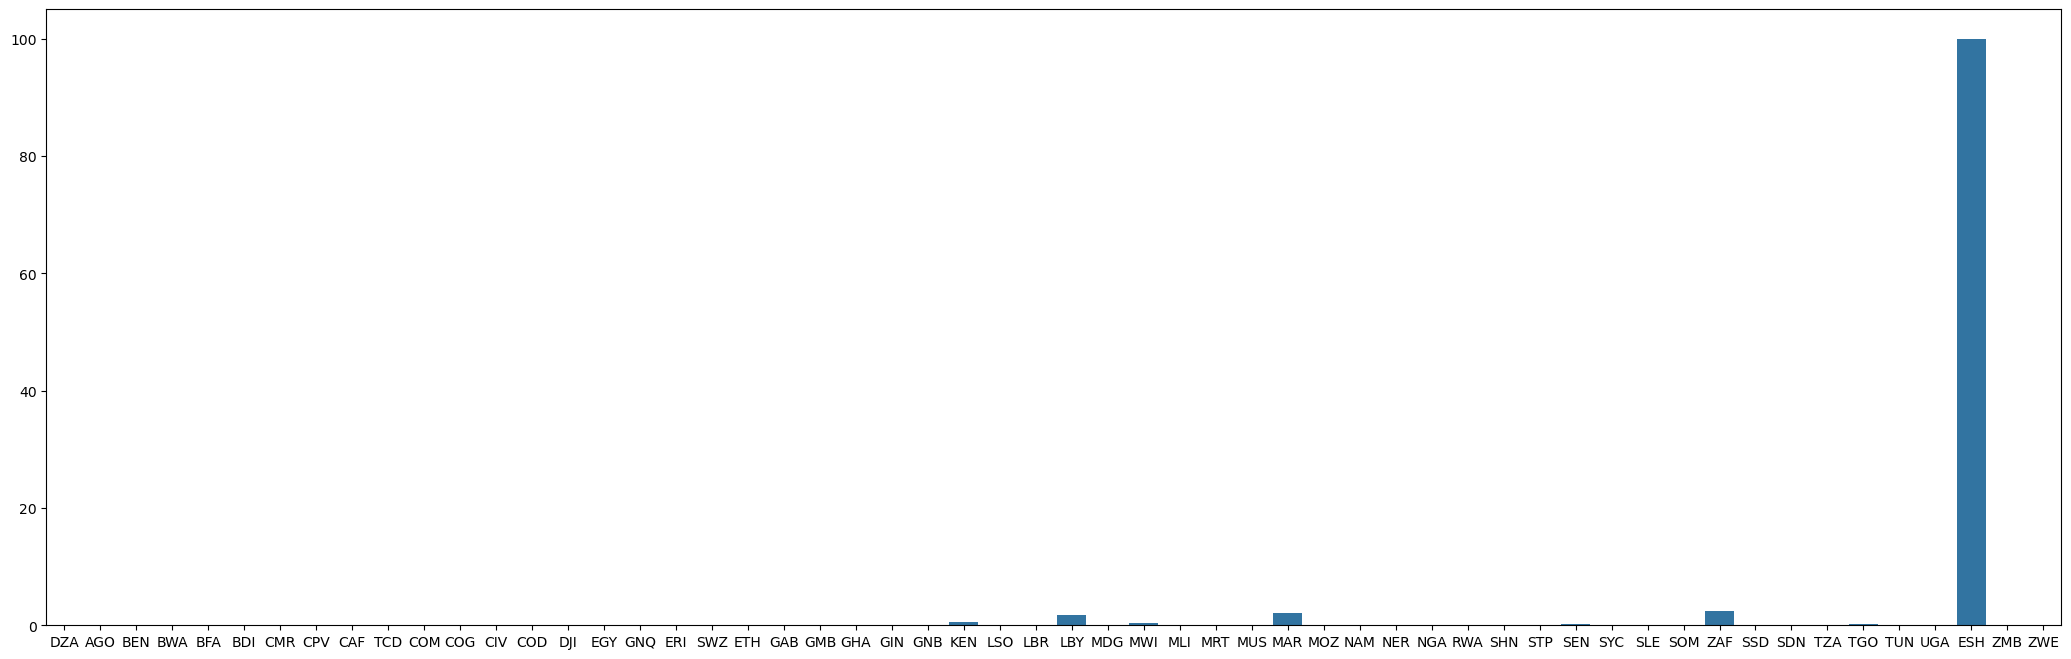

In [405]:
plotting_barplot_continent(unique_values_Africa, values_Africa)

#### 5.5 Total Cases North America

In [406]:
unique_values_North_America = countries_per_continent("North America")
unique_values_North_America

array(['AIA', 'ATG', 'ABW', 'BHS', 'BRB', 'BLZ', 'BMU', 'BES', 'VGB',
       'CAN', 'CYM', 'CRI', 'CUB', 'CUW', 'DMA', 'DOM', 'SLV', 'GRL',
       'GRD', 'GTM', 'HTI', 'HND', 'JAM', 'MEX', 'MSR', 'NIC', 'PAN',
       'PRI', 'KNA', 'LCA', 'SPM', 'VCT', 'SXM', 'TTO', 'TCA', 'USA',
       'VIR'], dtype=object)

In [407]:
values_North_America = continent_values(unique_values_North_America)

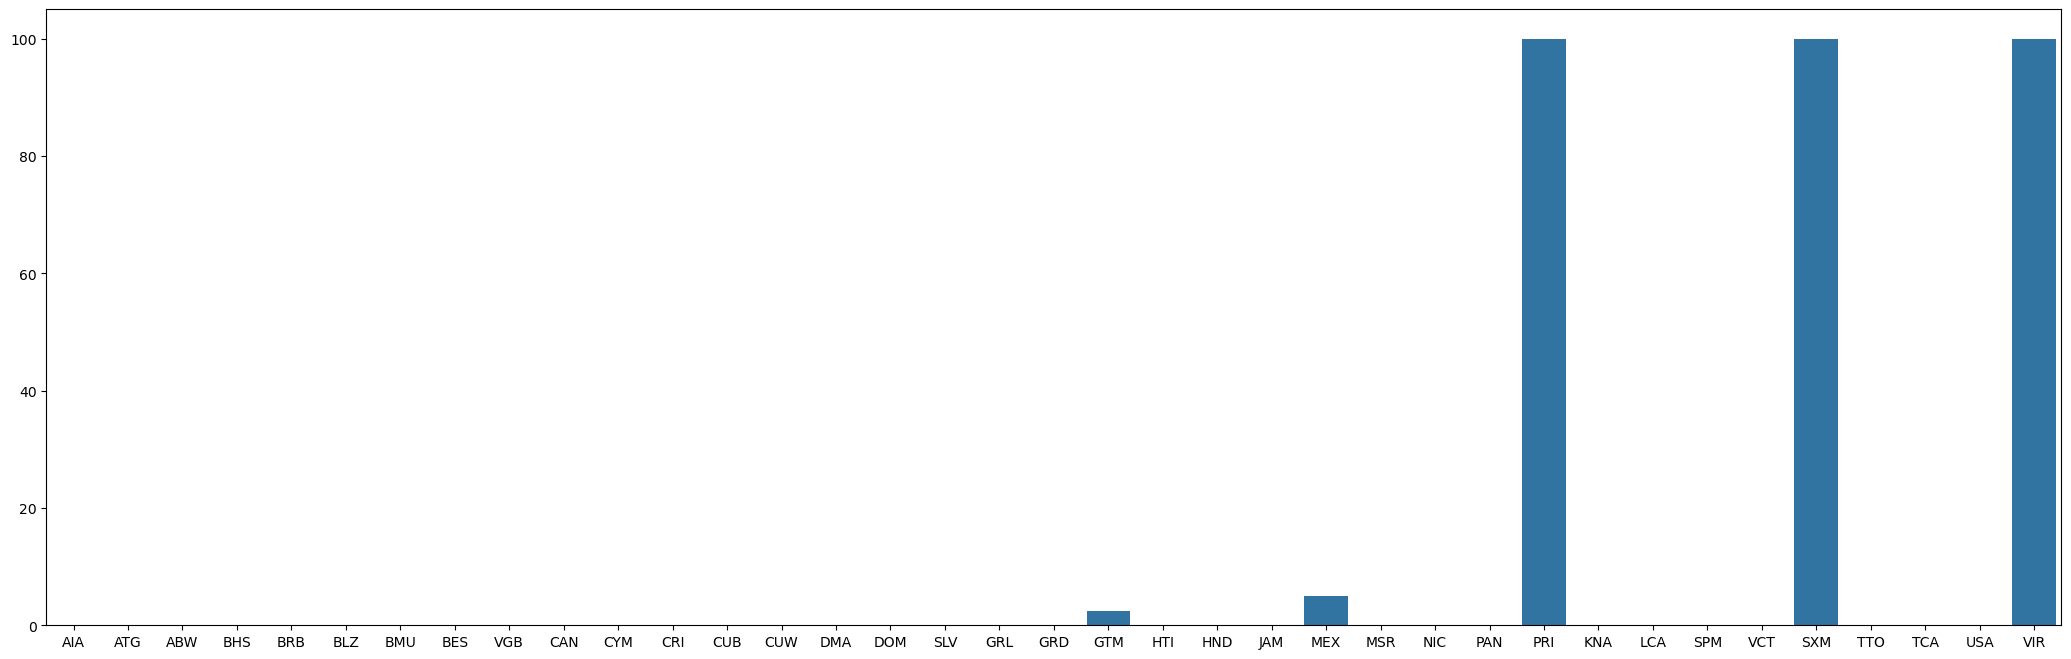

In [408]:
plotting_barplot_continent(unique_values_North_America, values_North_America)

### 6. Factual accuracy

#### 6.1 Do total cases and new cases lead to the same numbers?

Looking at Canada the reporting started on 23 of January but the first death was on March 9. A quick search on the internet confirms that 9 March was the date on which the frist Canadian person died. That makes 46 days on which there is no data on deaths. But there are 1132 entries for Canada and hence 46/1132 = 4%. In the case of Switzerland 10 no values for deaths and 1099 rows so that would make 1% of the data missing. For Germany 42/1128 = 4%. All of this data is not missing, it is just wrongly classified as NA when these should be zero.

In [409]:
def comparison_total_new_cases(country): 
    filtered_country = data_without_OWID.loc[df["location"] == "Sweden"]
    filtered_country_total_cases_from_tc = filtered_country.iloc[-1, 4]
    print ("total cases from the total cases column: ", filtered_country_total_cases_from_tc)
    print ("total cases when summing over new cases: ", filtered_country["new_cases"].sum())

comparison_total_new_cases("Sweden")

total cases from the total cases column:  2697827.0
total cases when summing over new cases:  2697827.0


#### 6.2 How accurate are vaccination statistics?

According to Wikipedia, the first vaccination in Switzerland, Germany and France tool place on December 23 2020, December 22, 2020 and December 17, 2020 respectively. The dataset confirms these:

In [410]:
def first_vaccination_statistics_accuracy(country):
    filtered_country = data_without_OWID.loc[df['location'] == country]
    filtered_country = filtered_country.reset_index(drop=True)
    first_vaccination_index = filtered_country["total_vaccinations"].first_valid_index()
    return filtered_country.iloc[first_vaccination_index,:5]
    
first_vaccination_statistics_accuracy("France")

iso_code                       FRA
continent                   Europe
location                    France
date           2020-12-27 00:00:00
total_cases              2599937.0
Name: 338, dtype: object

### 7. Country analysis

#### 7.1 Function to replace missing data with zeros

In [411]:
#here is how to replace the mssing values with zero values
def replace_missing_data(country):
    filtered_country = data_without_OWID.loc[df['location'] == country]
    #filtered_country = filtered_Italy.reset_index(drop=True)
    missing_vals = ["NA", "", None, np.NaN]
    missing_country = filtered_country.isin(missing_vals)


#### 7.2 Function for missing values excluding missing at the end and at the beginning for a specific country

In [412]:
def filtering_missing_country(country):
    filtered_country = data_without_OWID.loc[df['location'] == country]
    filtered_country = filtered_country.reset_index(drop=True)
    filtered_country_summary = filtered_country.isnull().sum()
    first_valid_indices_country = filtered_country.apply(lambda x: x.first_valid_index())
    last_valid_indices_country = filtered_country.apply(lambda x: x.last_valid_index())
    length = len(filtered_country) - 1

    filtered_country_summary_df = filtered_country_summary.to_frame()
    first_valid_indices_country_df = first_valid_indices_country.to_frame()
    last_valid_indices_country_df = last_valid_indices_country.to_frame()
    list_of_dataframes = [filtered_country_summary_df, first_valid_indices_country_df, last_valid_indices_country]

    comparison_country = pd.merge(filtered_country_summary_df, first_valid_indices_country_df, left_index=True, right_index=True)
    comparison_country = comparison_country.rename(columns={"0_x": '# of missing entries', "0_y": "first entry"})
    diff_first = filtered_country_summary_df - first_valid_indices_country_df
    last_valid_indices_country_df_diff = length - last_valid_indices_country_df
    diff_overall = filtered_country_summary_df - first_valid_indices_country_df - last_valid_indices_country_df_diff
    comparison_country = comparison_country.assign(diff_first = diff_first, \
                last_entry= last_valid_indices_country_df, diff_last = last_valid_indices_country_df_diff, \
                diff_overall = diff_overall)
    return (comparison_country)

In [413]:
filtering_missing_country("Finland")

# of missing entries  first entry  diff_first  last_entry  diff_last  diff_overall
iso_code                                                       0          0.0         0.0      1125.0        0.0           0.0
continent                                                      0          0.0         0.0      1125.0        0.0           0.0
location                                                       0          0.0         0.0      1125.0        0.0           0.0
date                                                           0          0.0         0.0      1125.0        0.0           0.0
total_cases                                                    0          0.0         0.0      1125.0        0.0           0.0
new_cases                                                      4          0.0         4.0      1121.0        4.0           0.0
new_cases_smoothed                                             9          5.0         4.0      1121.0        4.0           0.0
total_deaths                                                  38         38.0         0.0      1125.0        0.0           0.0
new_deaths                                                    43         38.0         5.0      1121.0        4.0           1.0
new_deaths_smoothed                                           48         43.0         5.0      1121.0        4.0           1.0
total_cases_per_million                                        0          0.0         0.0      1125.0        0.0           0.0
new_cases_per_million                                          4          0.0         4.0      1121.0        4.0           0.0
new_cases_smoothed_per_million                                 9          5.0         4.0      1121.0        4.0           0.0
total_deaths_per_million                                      38         38.0         0.0      1125.0        0.0           0.0
new_deaths_per_million                                        43         38.0         5.0      1121.0        4.0           1.0
new_deaths_smoothed_per_million                               48         43.0         5.0      1121.0        4.0           1.0
reproduction_rate                                             99         43.0        56.0      1069.0       56.0           0.0
icu_patients                                                 318         52.0       266.0      1037.0       88.0         178.0
icu_patients_per_million                                     318         52.0       266.0      1037.0       88.0         178.0
hosp_patients                                                318         52.0       266.0      1037.0       88.0         178.0
hosp_patients_per_million                                    318         52.0       266.0      1037.0       88.0         178.0
weekly_icu_admissions                                       1126          NaN         NaN         NaN        NaN           NaN
weekly_icu_admissions_per_million                           1126          NaN         NaN         NaN        NaN           NaN
weekly_hosp_admissions                                      1126          NaN         NaN         NaN        NaN           NaN
weekly_hosp_admissions_per_million                          1126          NaN         NaN         NaN        NaN           NaN
total_tests                                                  281         29.0       252.0       873.0      252.0           0.0
new_tests                                                    281         29.0       252.0       873.0      252.0           0.0
total_tests_per_thousand                                     281         29.0       252.0       873.0      252.0           0.0
new_tests_per_thousand                                       281         29.0       252.0       873.0      252.0           0.0
new_tests_smoothed                                           288         36.0       252.0       873.0      252.0           0.0
new_tests_smoothed_per_thousand                              288         36.0       252.0       873.0      

#### 7.3 Function total diff for many countries

In [414]:
def locations_per_continent(continent):
    filtered_continent = data_without_OWID.loc[df['continent'] == continent]
    unique_values_continent = filtered_continent['location'].unique()
    return unique_values_continent

In [415]:
unique_locations_Europe = locations_per_continent("Europe")
empty_df = pd.DataFrame()

def several_countries(list, dataframe):
    count = 0
    for i in (list):
        country = filtering_missing_country(i)
        #print (country)
        country_diff_overall_column = country["diff_overall"]
        #print (country_diff_overall_column)
        country_diff_overall_column_df = country_diff_overall_column.to_frame()
        if count == 0:
            combined_df = pd.concat([empty_df, country_diff_overall_column_df], axis=1)
            count = 1
        elif count > 0:
            combined_df = pd.concat([combined_df, country_diff_overall_column_df], axis=1)
        #print (country_diff_overall_column_df)
        combined_df = combined_df.rename(columns={'diff_overall': i})
    return (combined_df)

several_countries(unique_locations_Europe, empty_df)

Albania  Andorra  Austria  Belarus  Belgium  Bosnia and Herzegovina  Bulgaria  Croatia  Cyprus  Czechia  Denmark  Estonia  Faeroe Islands  Finland  France  Germany  Gibraltar  Greece  Guernsey  Hungary  Iceland  Ireland  Isle of Man  Italy  Jersey  Latvia  Liechtenstein  Lithuania  Luxembourg  Malta  Moldova  Monaco  Montenegro  Netherlands  North Macedonia  Norway  Poland  Portugal  Romania  Russia  San Marino  Serbia  Slovakia  Slovenia  Spain  Sweden  Switzerland  Ukraine  United Kingdom  Vatican
iso_code                                        0.0      0.0      0.0      0.0      0.0                     0.0       0.0      0.0     0.0      0.0      0.0      0.0             0.0      0.0     0.0      0.0        0.0     0.0       0.0      0.0      0.0      0.0          0.0    0.0     0.0     0.0            0.0        0.0         0.0    0.0      0.0     0.0         0.0          0.0              0.0     0.0     0.0       0.0      0.0     0.0         0.0     0.0       0.0       0.0    0.0     0.0          0.0      0.0             0.0      0.0
continent                                       0.0      0.0      0.0      0.0      0.0                     0.0       0.0      0.0     0.0      0.0      0.0      0.0             0.0      0.0     0.0      0.0        0.0     0.0       0.0      0.0      0.0      0.0          0.0    0.0     0.0     0.0            0.0        0.0         0.0    0.0      0.0     0.0         0.0          0.0              0.0     0.0     0.0       0.0      0.0     0.0         0.0     0.0       0.0       0.0    0.0     0.0          0.0      0.0             0.0      0.0
location                                        0.0      0.0      0.0      0.0      0.0                     0.0       0.0      0.0     0.0      0.0      0.0      0.0             0.0      0.0     0.0      0.0        0.0     0.0       0.0      0.0      0.0      0.0          0.0    0.0     0.0     0.0            0.0        0.0         0.0    0.0      0.0     0.0         0.0          0.0              0.0     0.0     0.0       0.0      0.0     0.0         0.0     0.0       0.0       0.0    0.0     0.0          0.0      0.0             0.0      0.0
date                                            0.0      0.0      0.0      0.0      0.0                     0.0       0.0      0.0     0.0      0.0      0.0      0.0             0.0      0.0     0.0      0.0        0.0     0.0       0.0      0.0      0.0      0.0          0.0    0.0     0.0     0.0            0.0        0.0         0.0    0.0      0.0     0.0         0.0          0.0              0.0     0.0     0.0       0.0      0.0     0.0         0.0     0.0       0.0       0.0    0.0     0.0          0.0      0.0             0.0      0.0
total_cases                                     0.0      0.0      0.0      0.0      0.0                     0.0       0.0      0.0     0.0      0.0      0.0      0.0             0.0      0.0     0.0      0.0        0.0     0.0       NaN      0.0      0.0      0.0          0.0    0.0     NaN     0.0            0.0        0.0         0.0    0.0      0.0     0.0         0.0          0.0              0.0     0.0     0.0       0.0      0.0     0.0         0.0     0.0       0.0       0.0    0.0     0.0          0.0      0.0             0.0      0.0
new_cases                                       0.0      0.0      4.0      0.0      0.0                     0.0       0.0      0.0     0.0      5.0      1.0      1.0             0.0      0.0    12.0      0.0        4.0     0.0       NaN      0.0      2.0      4.0          0.0    1.0     NaN     0.0            2.0        1.0         1.0    1.0      0.0     2.0         0.0          0.0              1.0     0.0     0.0       1.0      0.0     0.0         0.0     2.0       2.0       0.0    5.0     0.0          0.0      0.0             4.0      0.0
new_cases_smoothed                              0.0      0.0      3.0      0.0      0.0                     0.0       0.0      0.0     0.0      5.0      1.0      1.0             0.0      0.0    20.0   

In [416]:
country_of_interest = "Finland"
filtered = data_without_OWID.loc[df['location'] == country_of_interest]
filtered = filtered.reset_index(drop=True)
vaccinations = filtered["total_vaccinations"]
vaccinations.head(500)

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
5            NaN
6            NaN
7            NaN
8            NaN
9            NaN
10           NaN
11           NaN
12           NaN
13           NaN
14           NaN
15           NaN
16           NaN
17           NaN
18           NaN
19           NaN
20           NaN
21           NaN
22           NaN
23           NaN
24           NaN
25           NaN
26           NaN
27           NaN
28           NaN
29           NaN
30           NaN
31           NaN
32           NaN
33           NaN
34           NaN
35           NaN
36           NaN
37           NaN
38           NaN
39           NaN
40           NaN
41           NaN
42           NaN
43           NaN
44           NaN
45           NaN
46           NaN
47           NaN
48           NaN
49           NaN
50           NaN
51           NaN
52           NaN
53           NaN
54           NaN
55           NaN
56           NaN
57           NaN
58           N

Finland and other countries only reporting once per week

## 5 Handling of missing data

### Structure
1. Decision to delete columns 63:67
2. Decision over keeping or deleting/imputing columns 0:16 (Nico)
3. Decision over keeping or deleting/imputing columns 16:32 (Leon)
4. Decision over keeping or deleting/imputing columns 32:48 (Florin)
5. Decision over keeping or deleting/imputing columns 48:63 (Sevi)
6. Actual imputations and deletions

### 1. Decision to delete columns 63:67

In [417]:
missing_percentages = df.iloc[:,63:].isnull().sum() / df.shape[0] *100
print(missing_percentages)

excess_mortality_cumulative_absolute       96.6807
excess_mortality_cumulative                96.6807
excess_mortality                           96.6807
excess_mortality_cumulative_per_million    96.6807
dtype: float64


More than 95% of entries are missing. These four columns will be deleted entirely

### 2. Decision over keeping or deleting/imputing columns 0:16 (Nico)

### 3. Decision over keeping or deleting/imputing columns 16:32 (Leon)

#### 3.1 Missing data percentages (Leon)

In [428]:
columns_leon = data.columns[16:32]
missing_percentages_leon = df[columns_leon].isnull().sum() / df.shape[0] *100
print(missing_percentages_leon)

reproduction_rate                     29.071218
icu_patients                          86.680969
icu_patients_per_million              86.680969
hosp_patients                         85.499699
hosp_patients_per_million             85.499699
weekly_icu_admissions                 96.655371
weekly_icu_admissions_per_million     96.655371
weekly_hosp_admissions                92.091861
weekly_hosp_admissions_per_million    92.091861
total_tests                           69.532980
new_tests                             71.061953
total_tests_per_thousand              69.532980
new_tests_per_thousand                71.061953
new_tests_smoothed                    60.100473
new_tests_smoothed_per_thousand       60.100473
positive_rate                         63.185284
dtype: float64


#### 3.2 Checking what imputation makes sense for reproduction rate

In [437]:
all_countries = data_without_OWID.groupby("location").groups.keys()
rrate_nan_per_country = several_countries(all_countries, empty_df).loc["reproduction_rate"]

### 4. Decision over keeping or deleting/imputing columns 32:48 (Florin)

### 5. Decision over keeping or deleting/imputing columns 48:63 (Sevi)

### 6. Actual imputations and deletions

In [423]:
data_clean = data.drop(["excess_mortality_cumulative_absolute", "excess_mortality_cumulative", "excess_mortality", "excess_mortality_cumulative_per_million"], axis=1, inplace=False)

###






#insert all your drops and imputations here and save in clean_data!
#Von jetzt an nur noch clean_data brauchen






###

## 6 Data preprocessing (Handling of missing data excluded) 

### Structure
1. Looking for outliers
2. Distribution of data
3. Scaling

### 1. Looking for outliers

In [419]:
"""
summary_stats = data_clean.describe()
Q1 = summary_stats.loc['25%']
Q3 = summary_stats.loc['75%']
IQR = Q3 - Q1
# Define outliers using IQR rule
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
# Align DataFrame columns with summary statistics columns
data_clean, lower_bound = data_clean.align(lower_bound, axis=1, join='inner')
data_clean, upper_bound = data_clean.align(upper_bound, axis=1, join='inner')
outliers = data_clean[(data_clean < lower_bound) | (data_clean > upper_bound)].dropna(axis=1, how='all')
if not outliers.empty:
    print("Outliers:")
    print(outliers)
else:
    print("No outliers found.")
"""

'\nsummary_stats = data.describe()\nQ1 = summary_stats.loc[\'25%\']\nQ3 = summary_stats.loc[\'75%\']\nIQR = Q3 - Q1\n# Define outliers using IQR rule\nlower_bound = Q1 - 1.5 * IQR\nupper_bound = Q3 + 1.5 * IQR\n# Align DataFrame columns with summary statistics columns\ndata, lower_bound = data.align(lower_bound, axis=1, join=\'inner\')\ndata, upper_bound = data.align(upper_bound, axis=1, join=\'inner\')\noutliers = data[(data < lower_bound) | (data > upper_bound)].dropna(axis=1, how=\'all\')\nif not outliers.empty:\n    print("Outliers:")\n    print(outliers)\nelse:\n    print("No outliers found.")\n'

### 2. Distribution of data 

#### 2.1 Distribution of numercial data

Testing whether the data is normally distributed or not:
Using the anderson darling test, since the shapiro wilks is not suitable for data n > 5000 

In [422]:
num_data = data_clean.select_dtypes(include='number')
distribution_results = {}
for column in num_data.columns:
    result = sts.anderson(num_data[column].dropna(), dist='norm')  ############################### I had to drop all na for it to work!!! -> maybe imputation needed
    test_stat = result.statistic 
    critical_val = result.critical_values
    #print(critical_val)                                
    #print(test_stat)                           
    if test_stat > critical_val[2]:
        result = "not normal"
    else:
        result = "normal"    
    distribution_results[column] = result


not_normal = []
for key, value in distribution_results.items():
    if value == "not normal":
        not_normal.append(key)
if len(not_normal) == 0:
    print("All numerical data seems to be normally distributed.")
elif len(not_normal) == len(num_data.columns):
    print("No variable is normally distributed.")
else:
    print("All data but", not_normal, "seems to be normally distributed")

No variable is normally distributed.


#### Distribution of numercial data visually

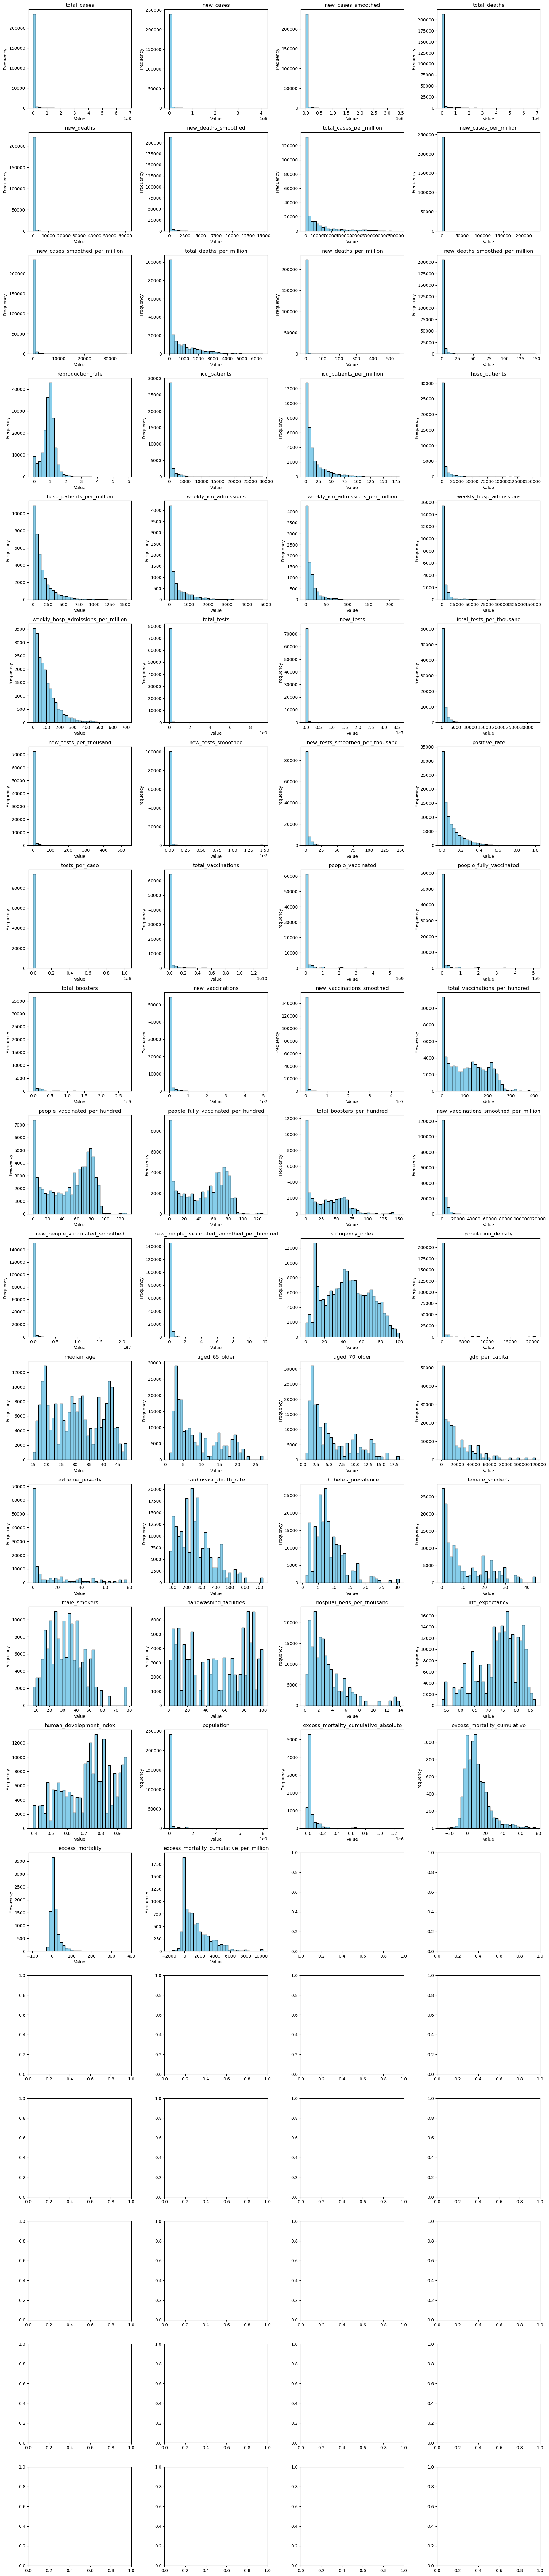

In [421]:
columns_per_row = 3
num_columns = len(num_data.columns)
num_rows = (num_columns - 1) // columns_per_row + 1
fig_width = 6 * columns_per_row
fig_height = 4 * num_rows
fig, axs = plt.subplots(num_rows, 4, figsize=(fig_width, fig_height))
axs = axs.flatten()
for i, column in enumerate(num_data.columns):
    ax = axs[i]
    ax.hist(num_data[column], bins=35, color='skyblue', edgecolor='black')
    ax.set_title(column)
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')
plt.tight_layout()
plt.savefig("../output/Preprocessing/Distributions/distributions_of_variables.png")

### 3. Scaling